<h1><b>5. <u>Code with Outputs</u></b></h1>

# Heart Attack Prediction Model

This notebook demonstrates the development of machine learning models to predict heart attack likelihood based on medical data.

## Setup and Installation

Install required dependencies:

In [ ]:
%pip install -r requirements.txt

## Data Loading

Download and load the heart attack dataset from Kaggle:

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid")

print("Path to dataset files:", path)

Path to dataset files: /home/shivam-tiwari/.cache/kagglehub/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid/versions/1


In [3]:
import pandas as pd

## Data Exploration

Explore the dataset to understand its structure and contents:

In [4]:
# Load the dataset
data = pd.read_csv(f"{path}/Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


## Data Visualization

Visualize relationships between features using pair plots:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Set high DPI for print quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

### 1. Distribution of Heart Attack Results

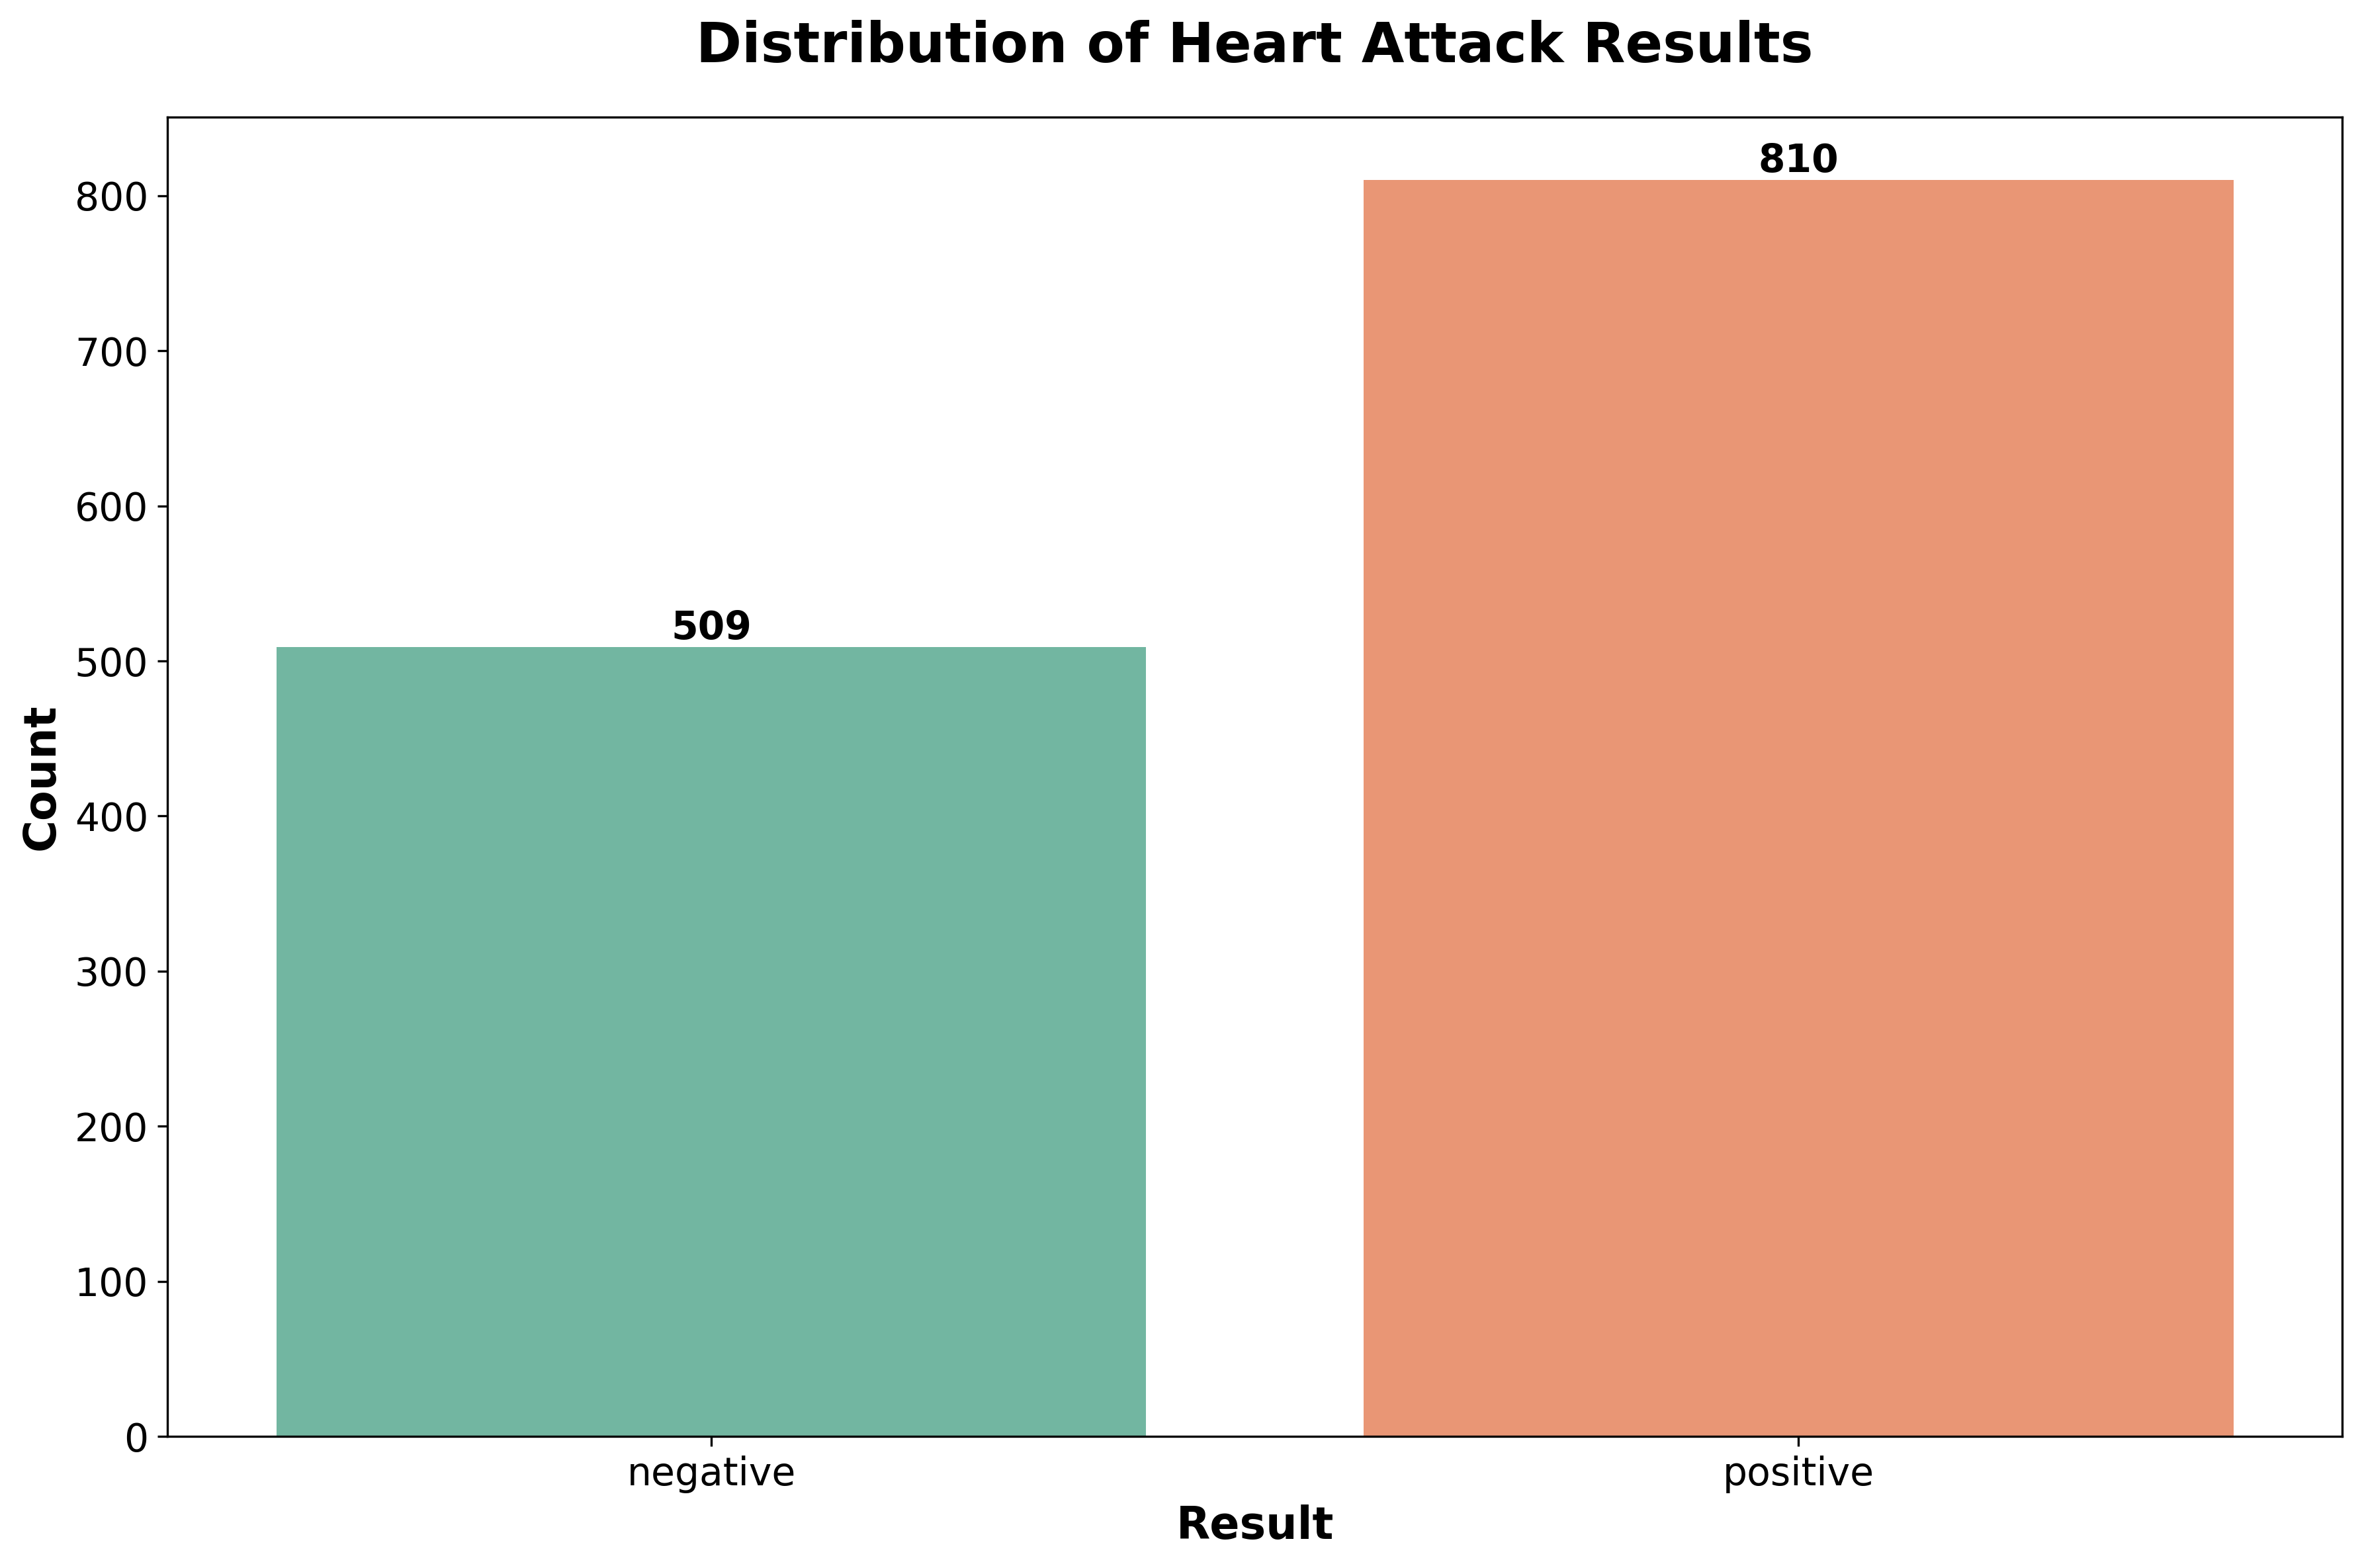

In [11]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='Result', palette='Set2', hue='Result', legend=False)
plt.title('Distribution of Heart Attack Results', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Result', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 2. Age Distribution by Heart Attack Result

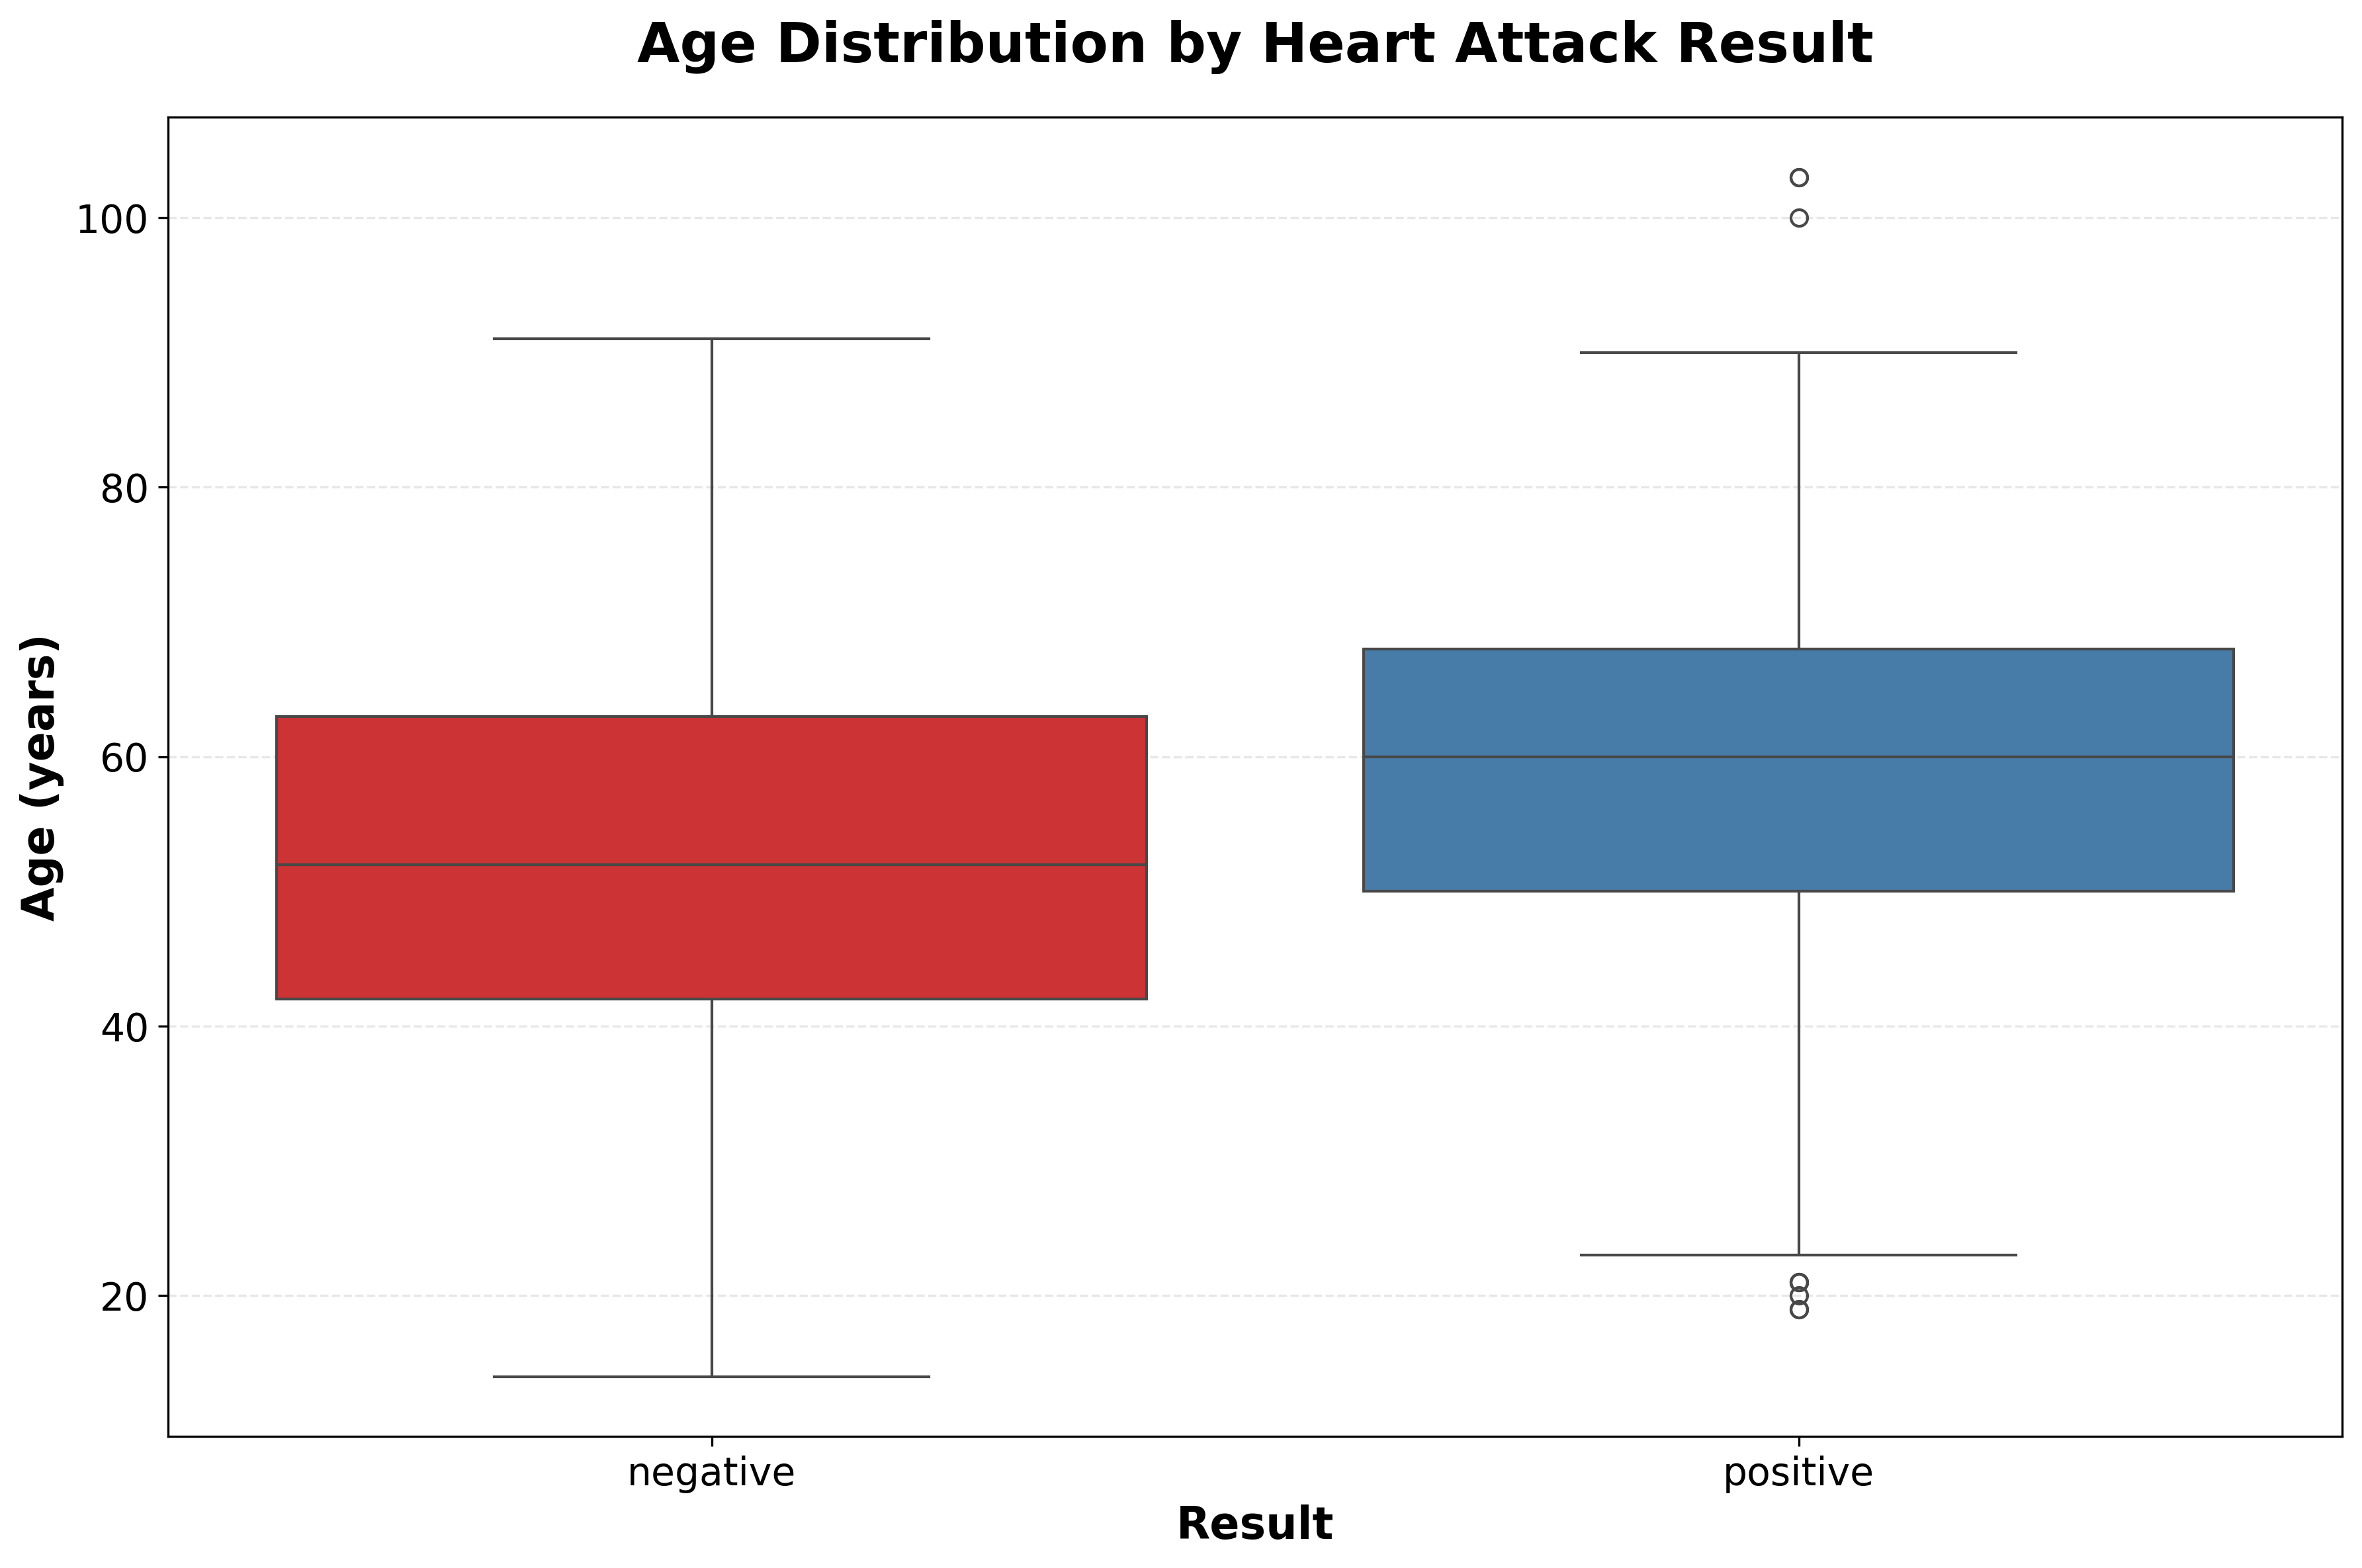

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Result', y='Age', palette='Set1', hue='Result', legend=False)
plt.title('Age Distribution by Heart Attack Result', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Result', fontsize=16, fontweight='bold')
plt.ylabel('Age (years)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### 3. Heart Rate Distribution Analysis

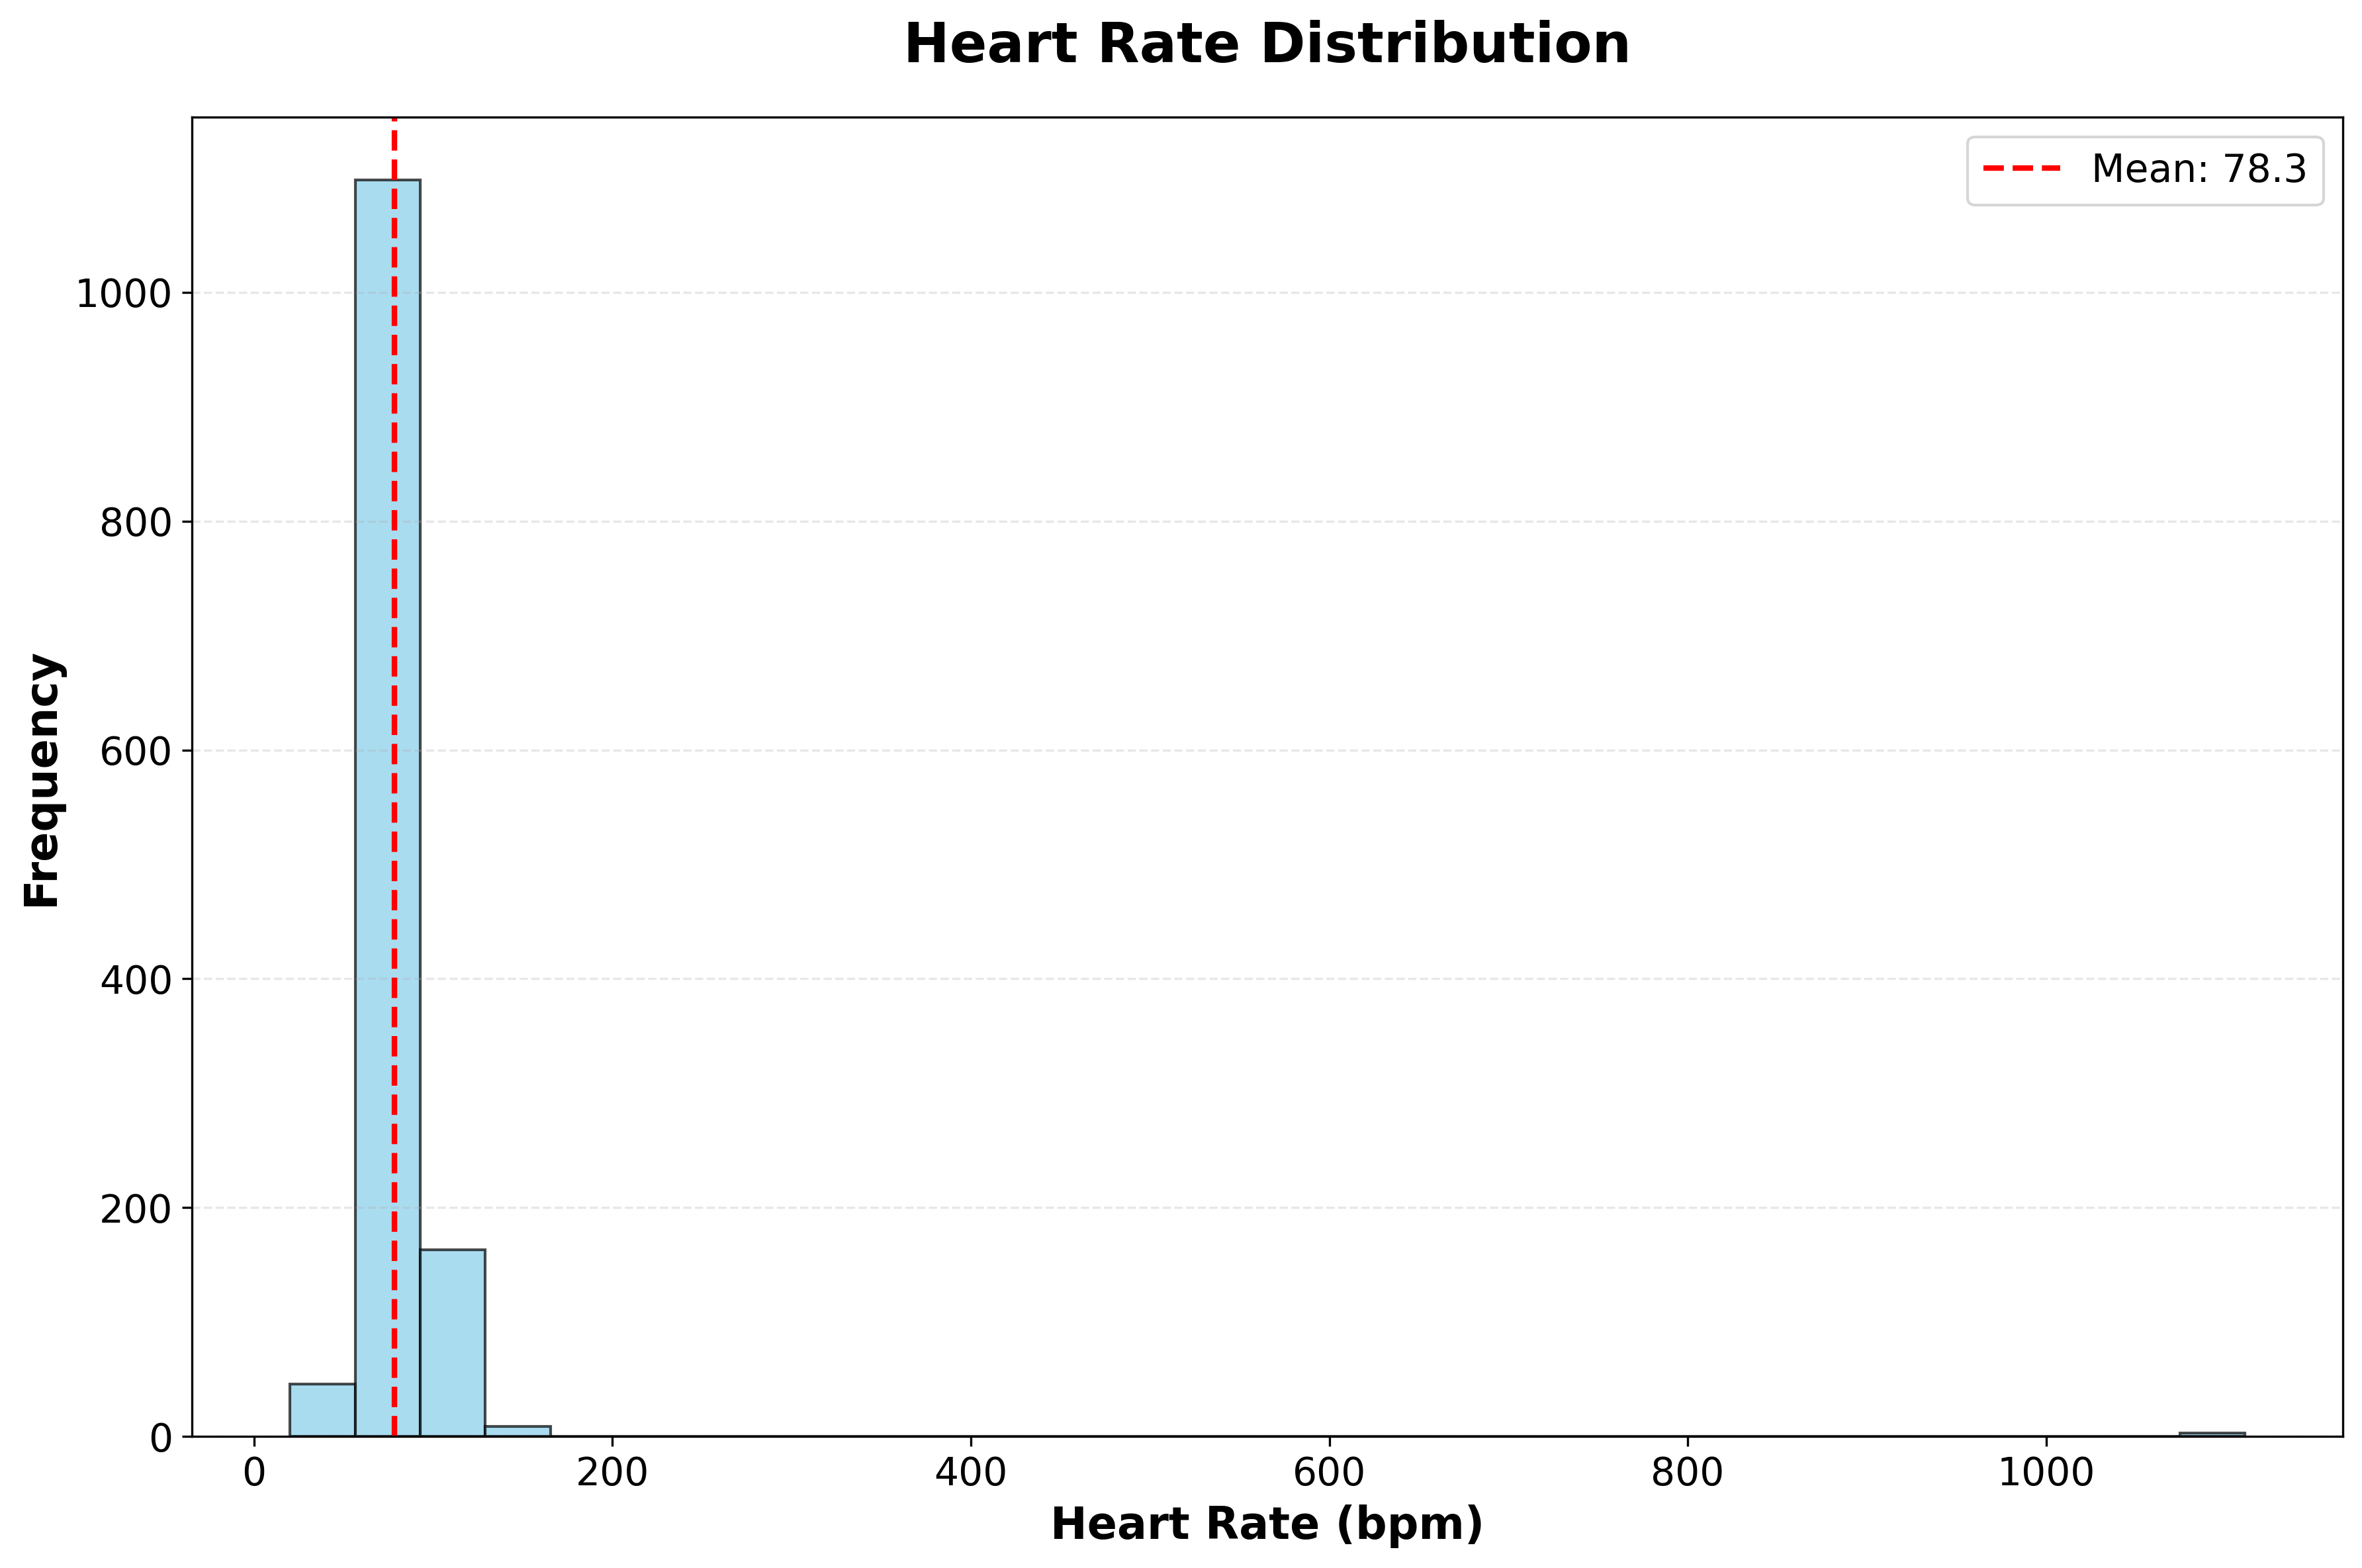

In [13]:
plt.figure(figsize=(12, 8))
plt.hist(data['Heart rate'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Heart Rate Distribution', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Heart Rate (bpm)', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.axvline(data['Heart rate'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data["Heart rate"].mean():.1f}')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### 4. Blood Pressure Analysis (Systolic vs Diastolic)

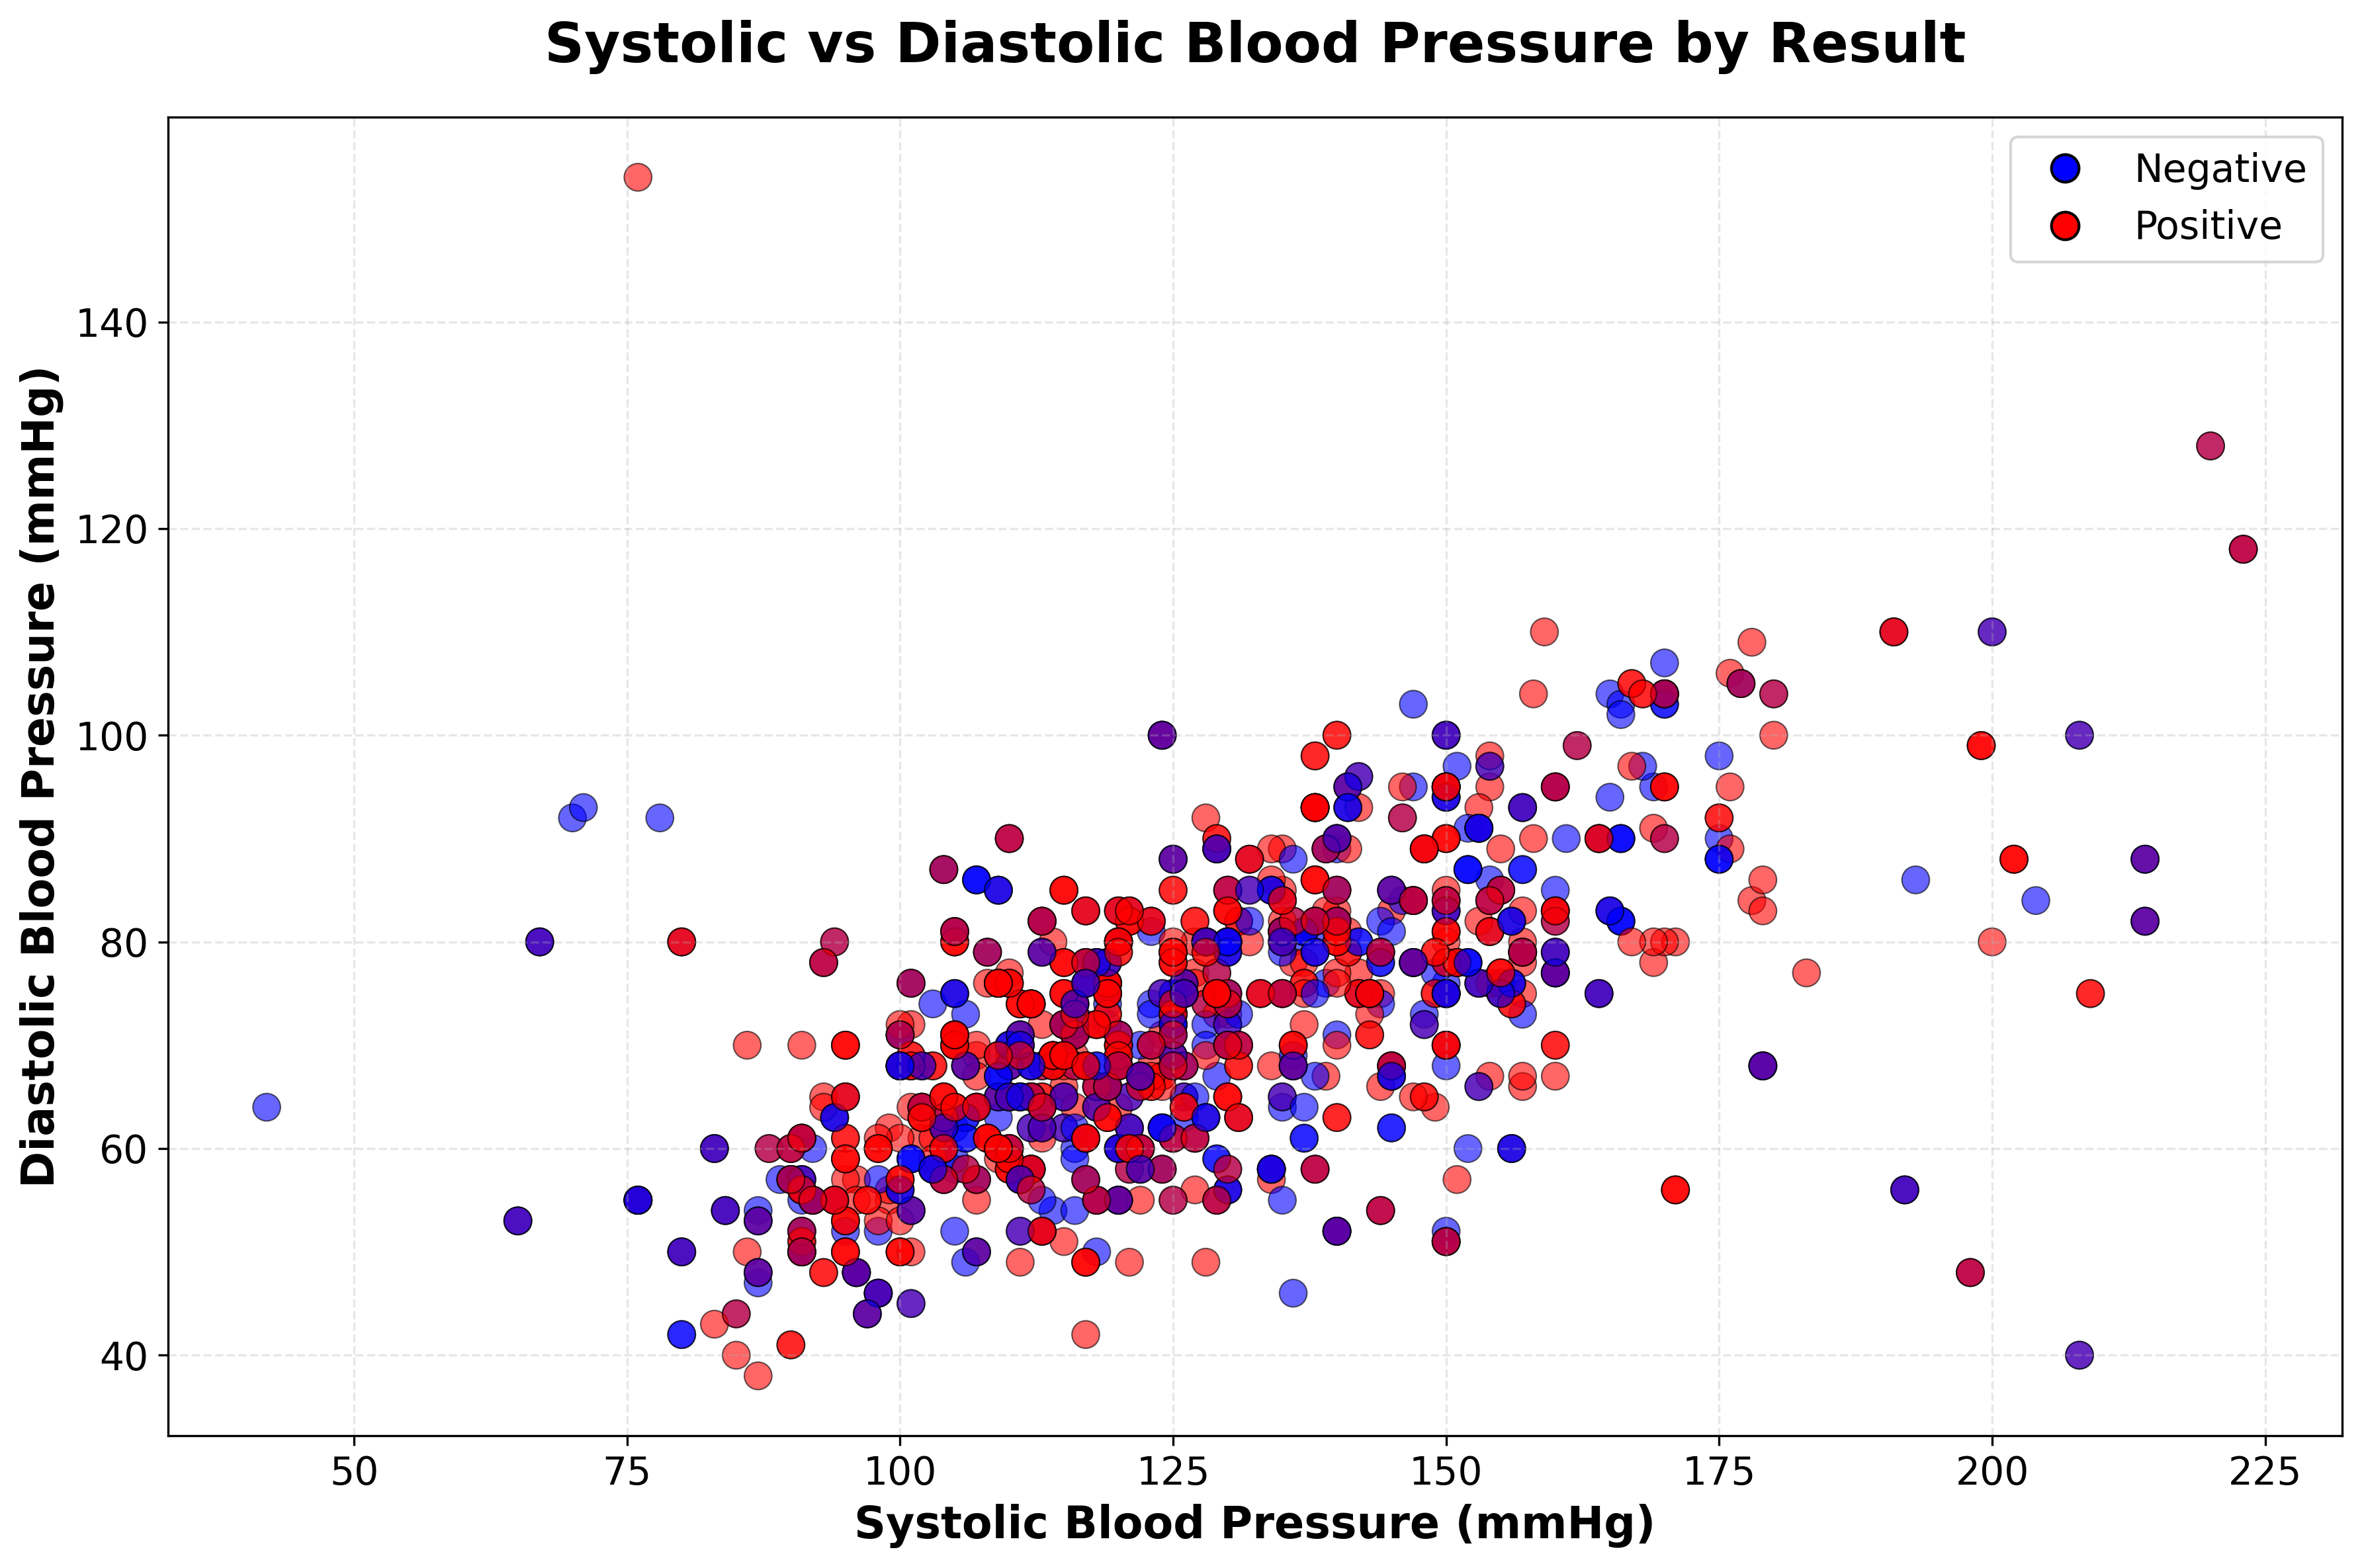

In [14]:
plt.figure(figsize=(12, 8))
colors = data['Result'].map({'negative': 'blue', 'positive': 'red'})
scatter = plt.scatter(data['Systolic blood pressure'], 
                     data['Diastolic blood pressure'],
                     c=colors, alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

plt.title('Systolic vs Diastolic Blood Pressure by Result', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Systolic Blood Pressure (mmHg)', fontsize=16, fontweight='bold')
plt.ylabel('Diastolic Blood Pressure (mmHg)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(alpha=0.3, linestyle='--')

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                         markersize=10, label='Negative', markeredgecolor='black'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                         markersize=10, label='Positive', markeredgecolor='black')]
plt.legend(handles=legend_elements, fontsize=14, loc='upper right')

plt.tight_layout()
plt.show()

### 5. Blood Sugar Levels by Result

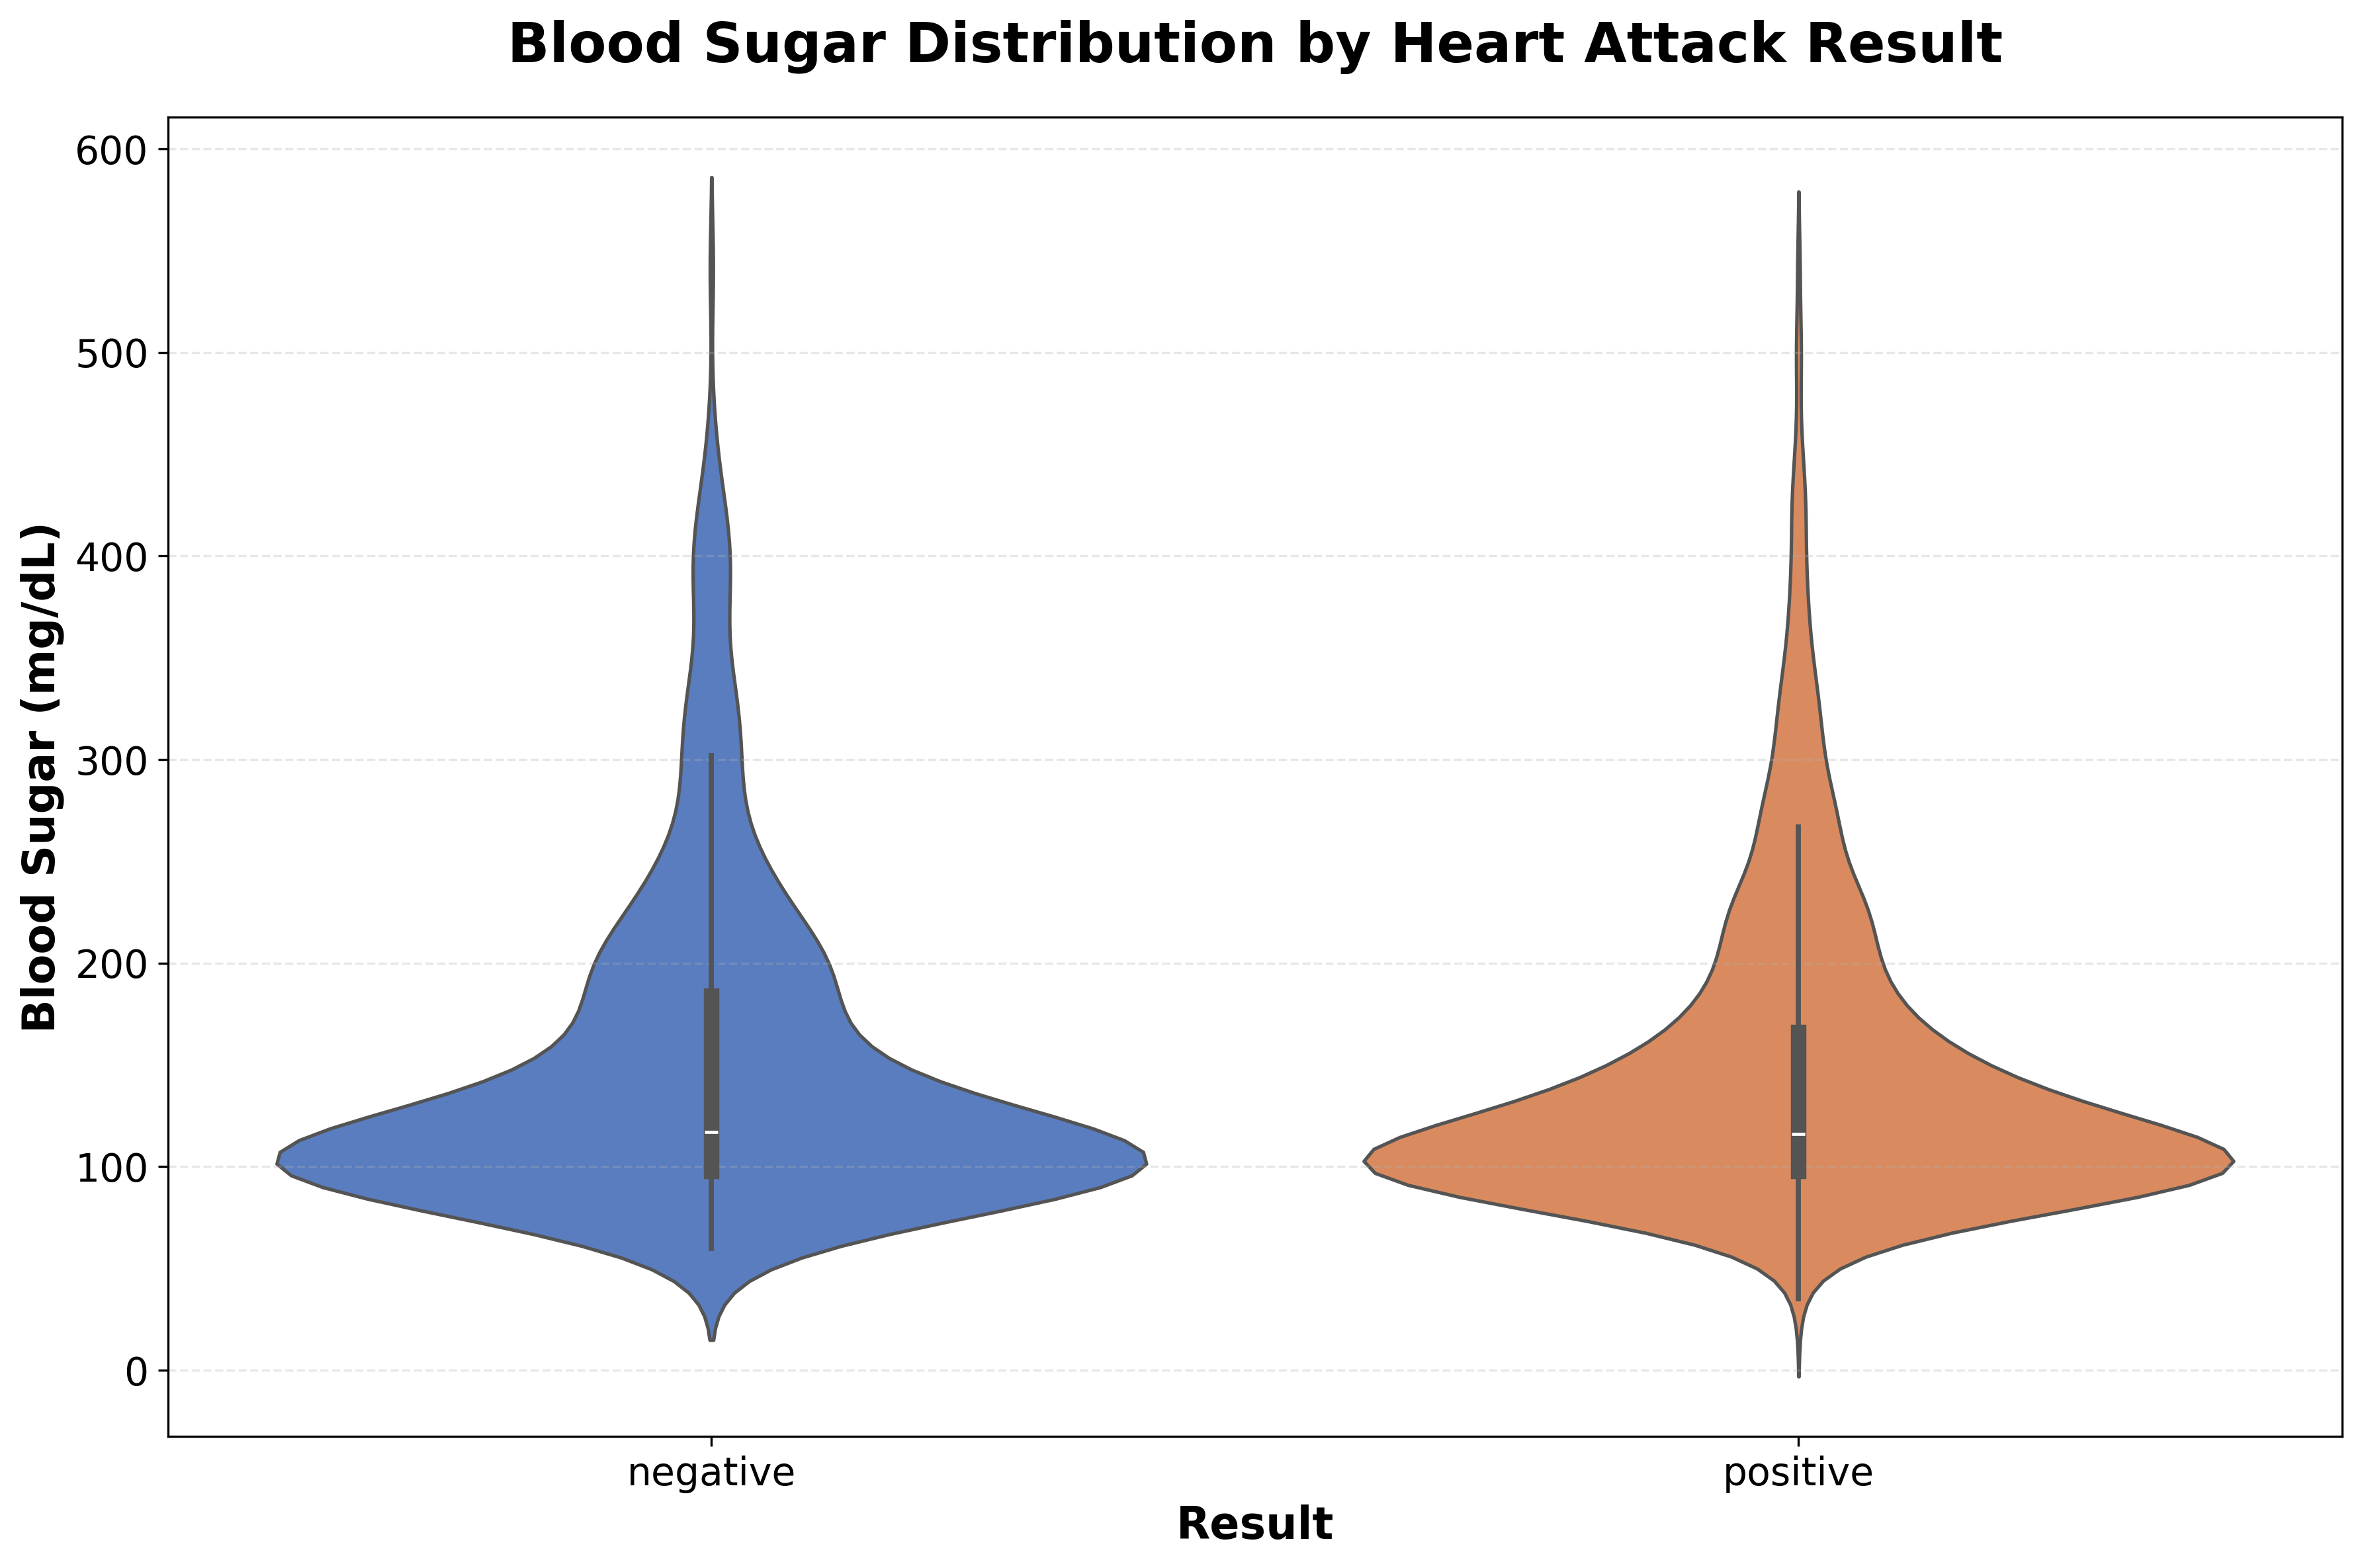

In [15]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Result', y='Blood sugar', palette='muted', hue='Result', legend=False)
plt.title('Blood Sugar Distribution by Heart Attack Result', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Result', fontsize=16, fontweight='bold')
plt.ylabel('Blood Sugar (mg/dL)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### 6. CK-MB Levels Comparison

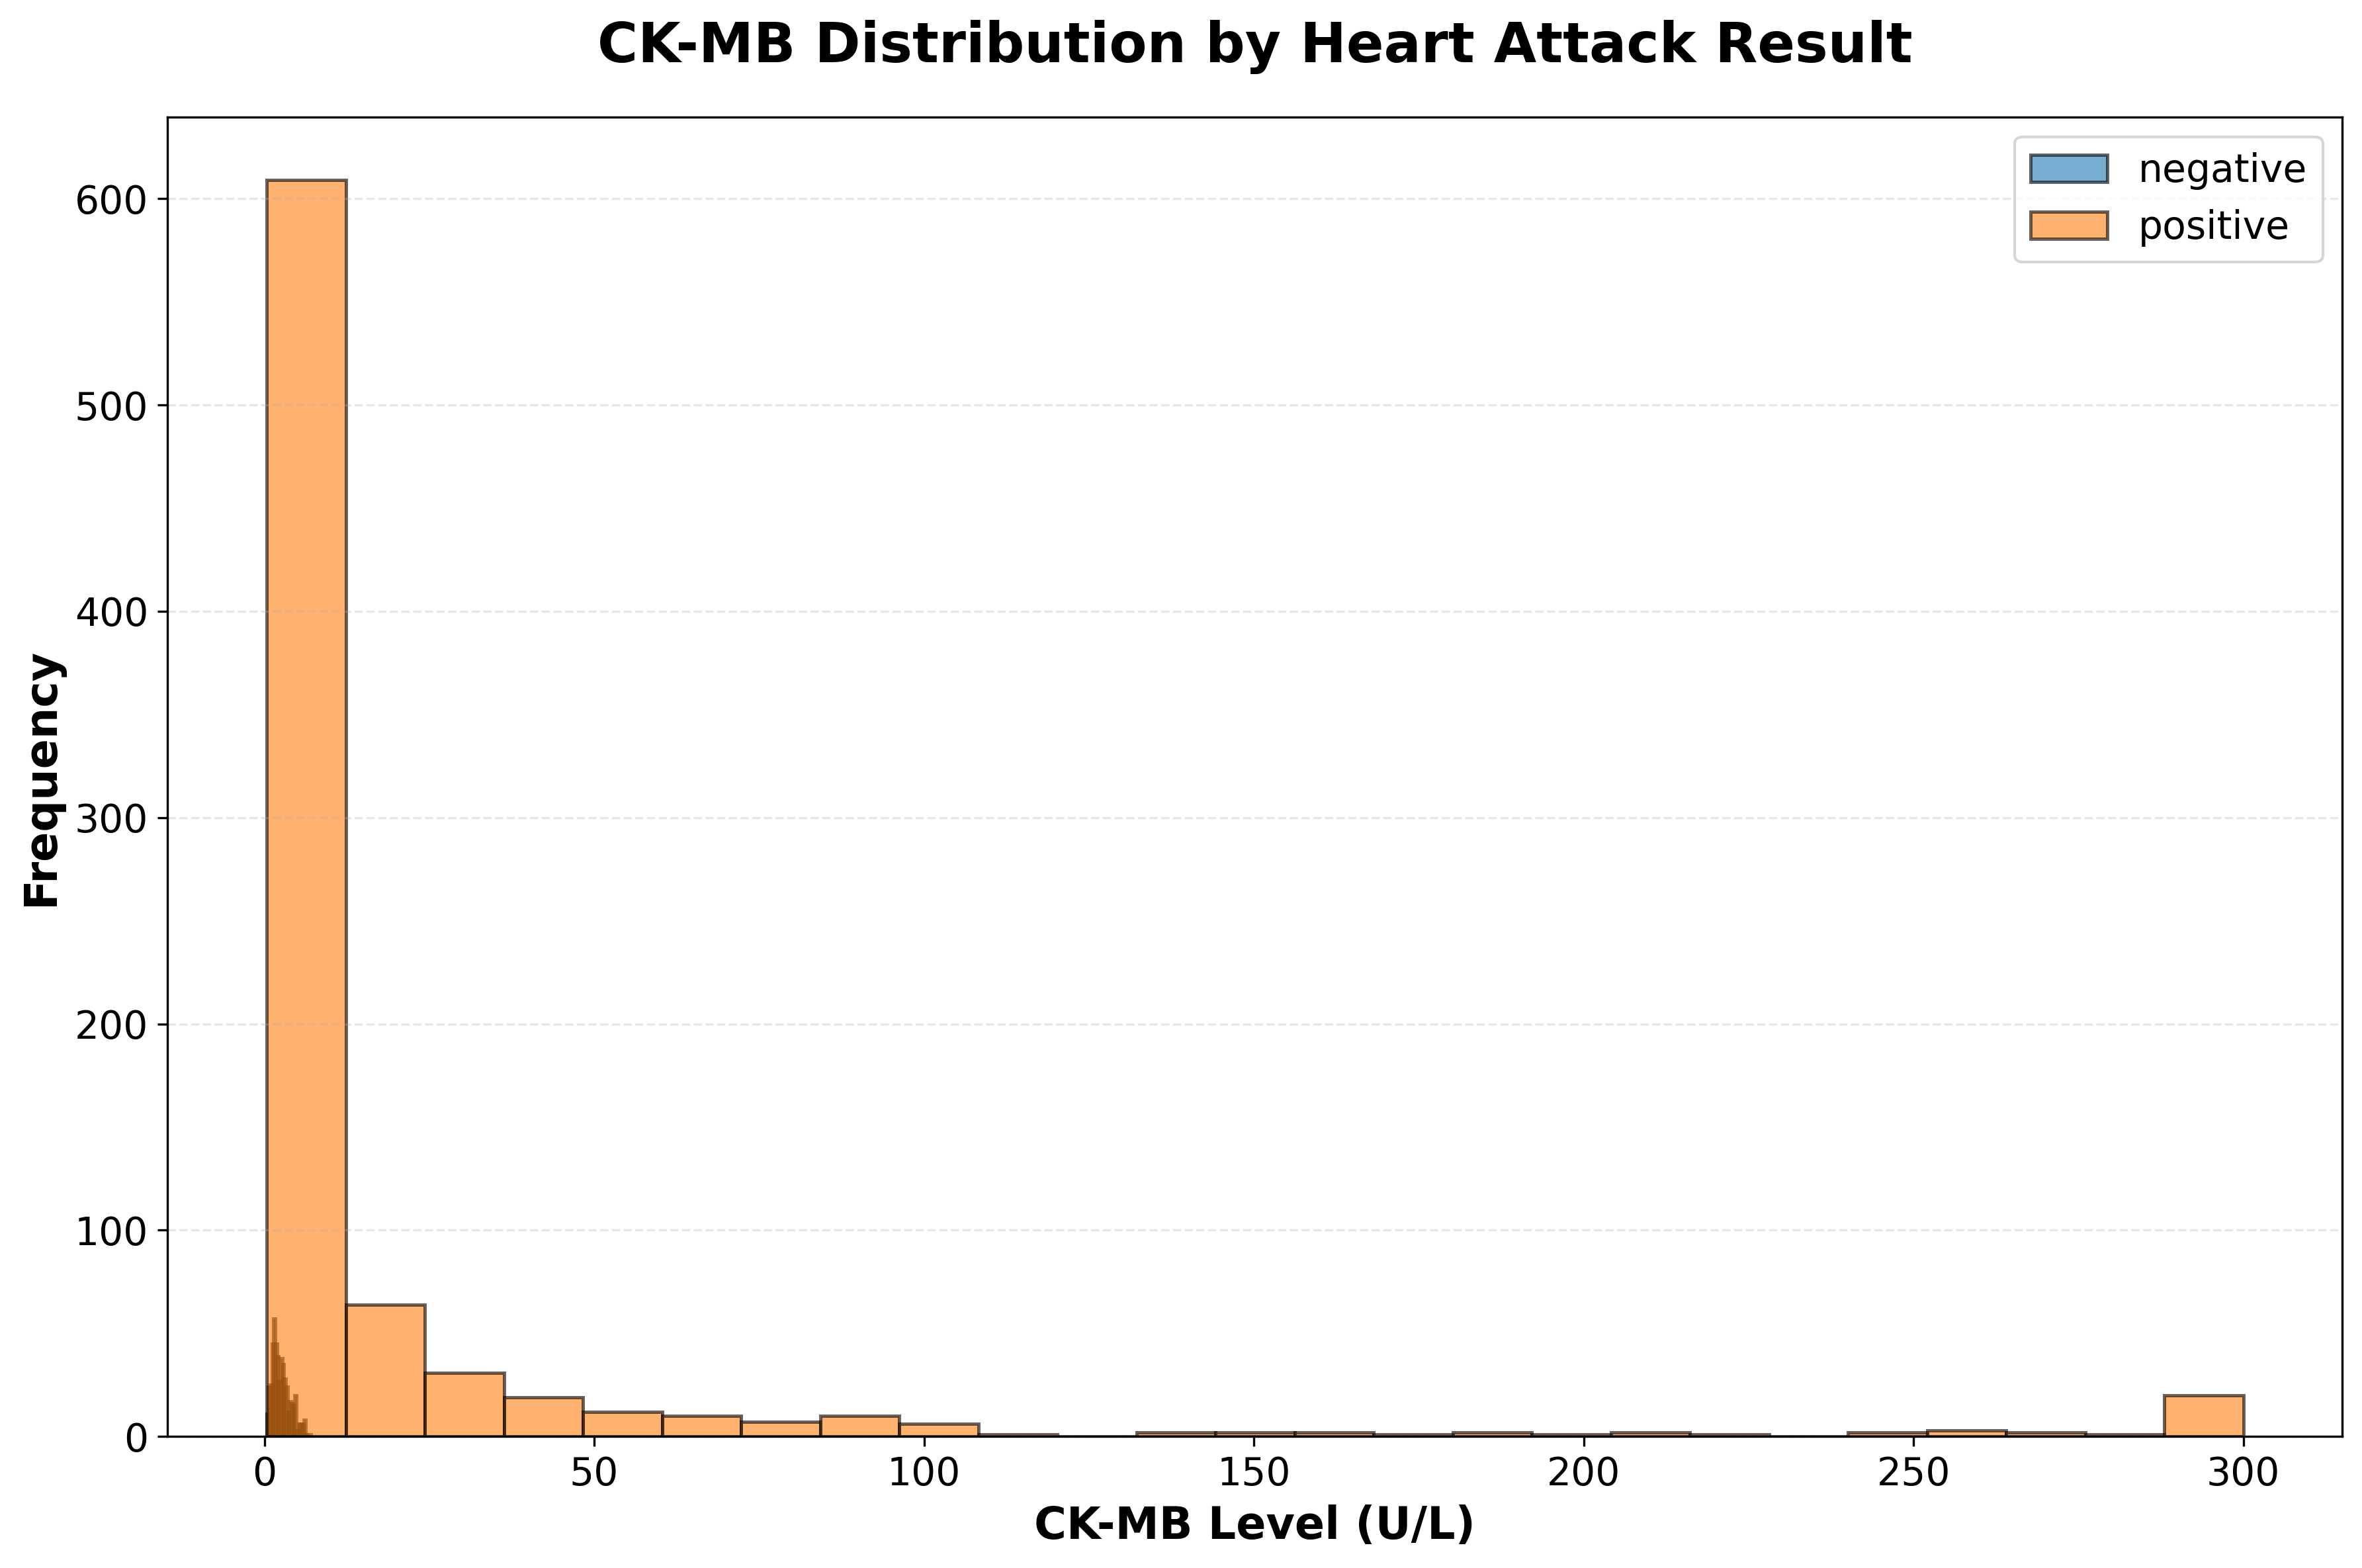

In [16]:
plt.figure(figsize=(12, 8))
for result in data['Result'].unique():
    subset = data[data['Result'] == result]['CK-MB'].dropna()
    plt.hist(subset, bins=25, alpha=0.6, label=result, edgecolor='black', linewidth=1.2)

plt.title('CK-MB Distribution by Heart Attack Result', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('CK-MB Level (U/L)', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### 7. Troponin Levels by Result

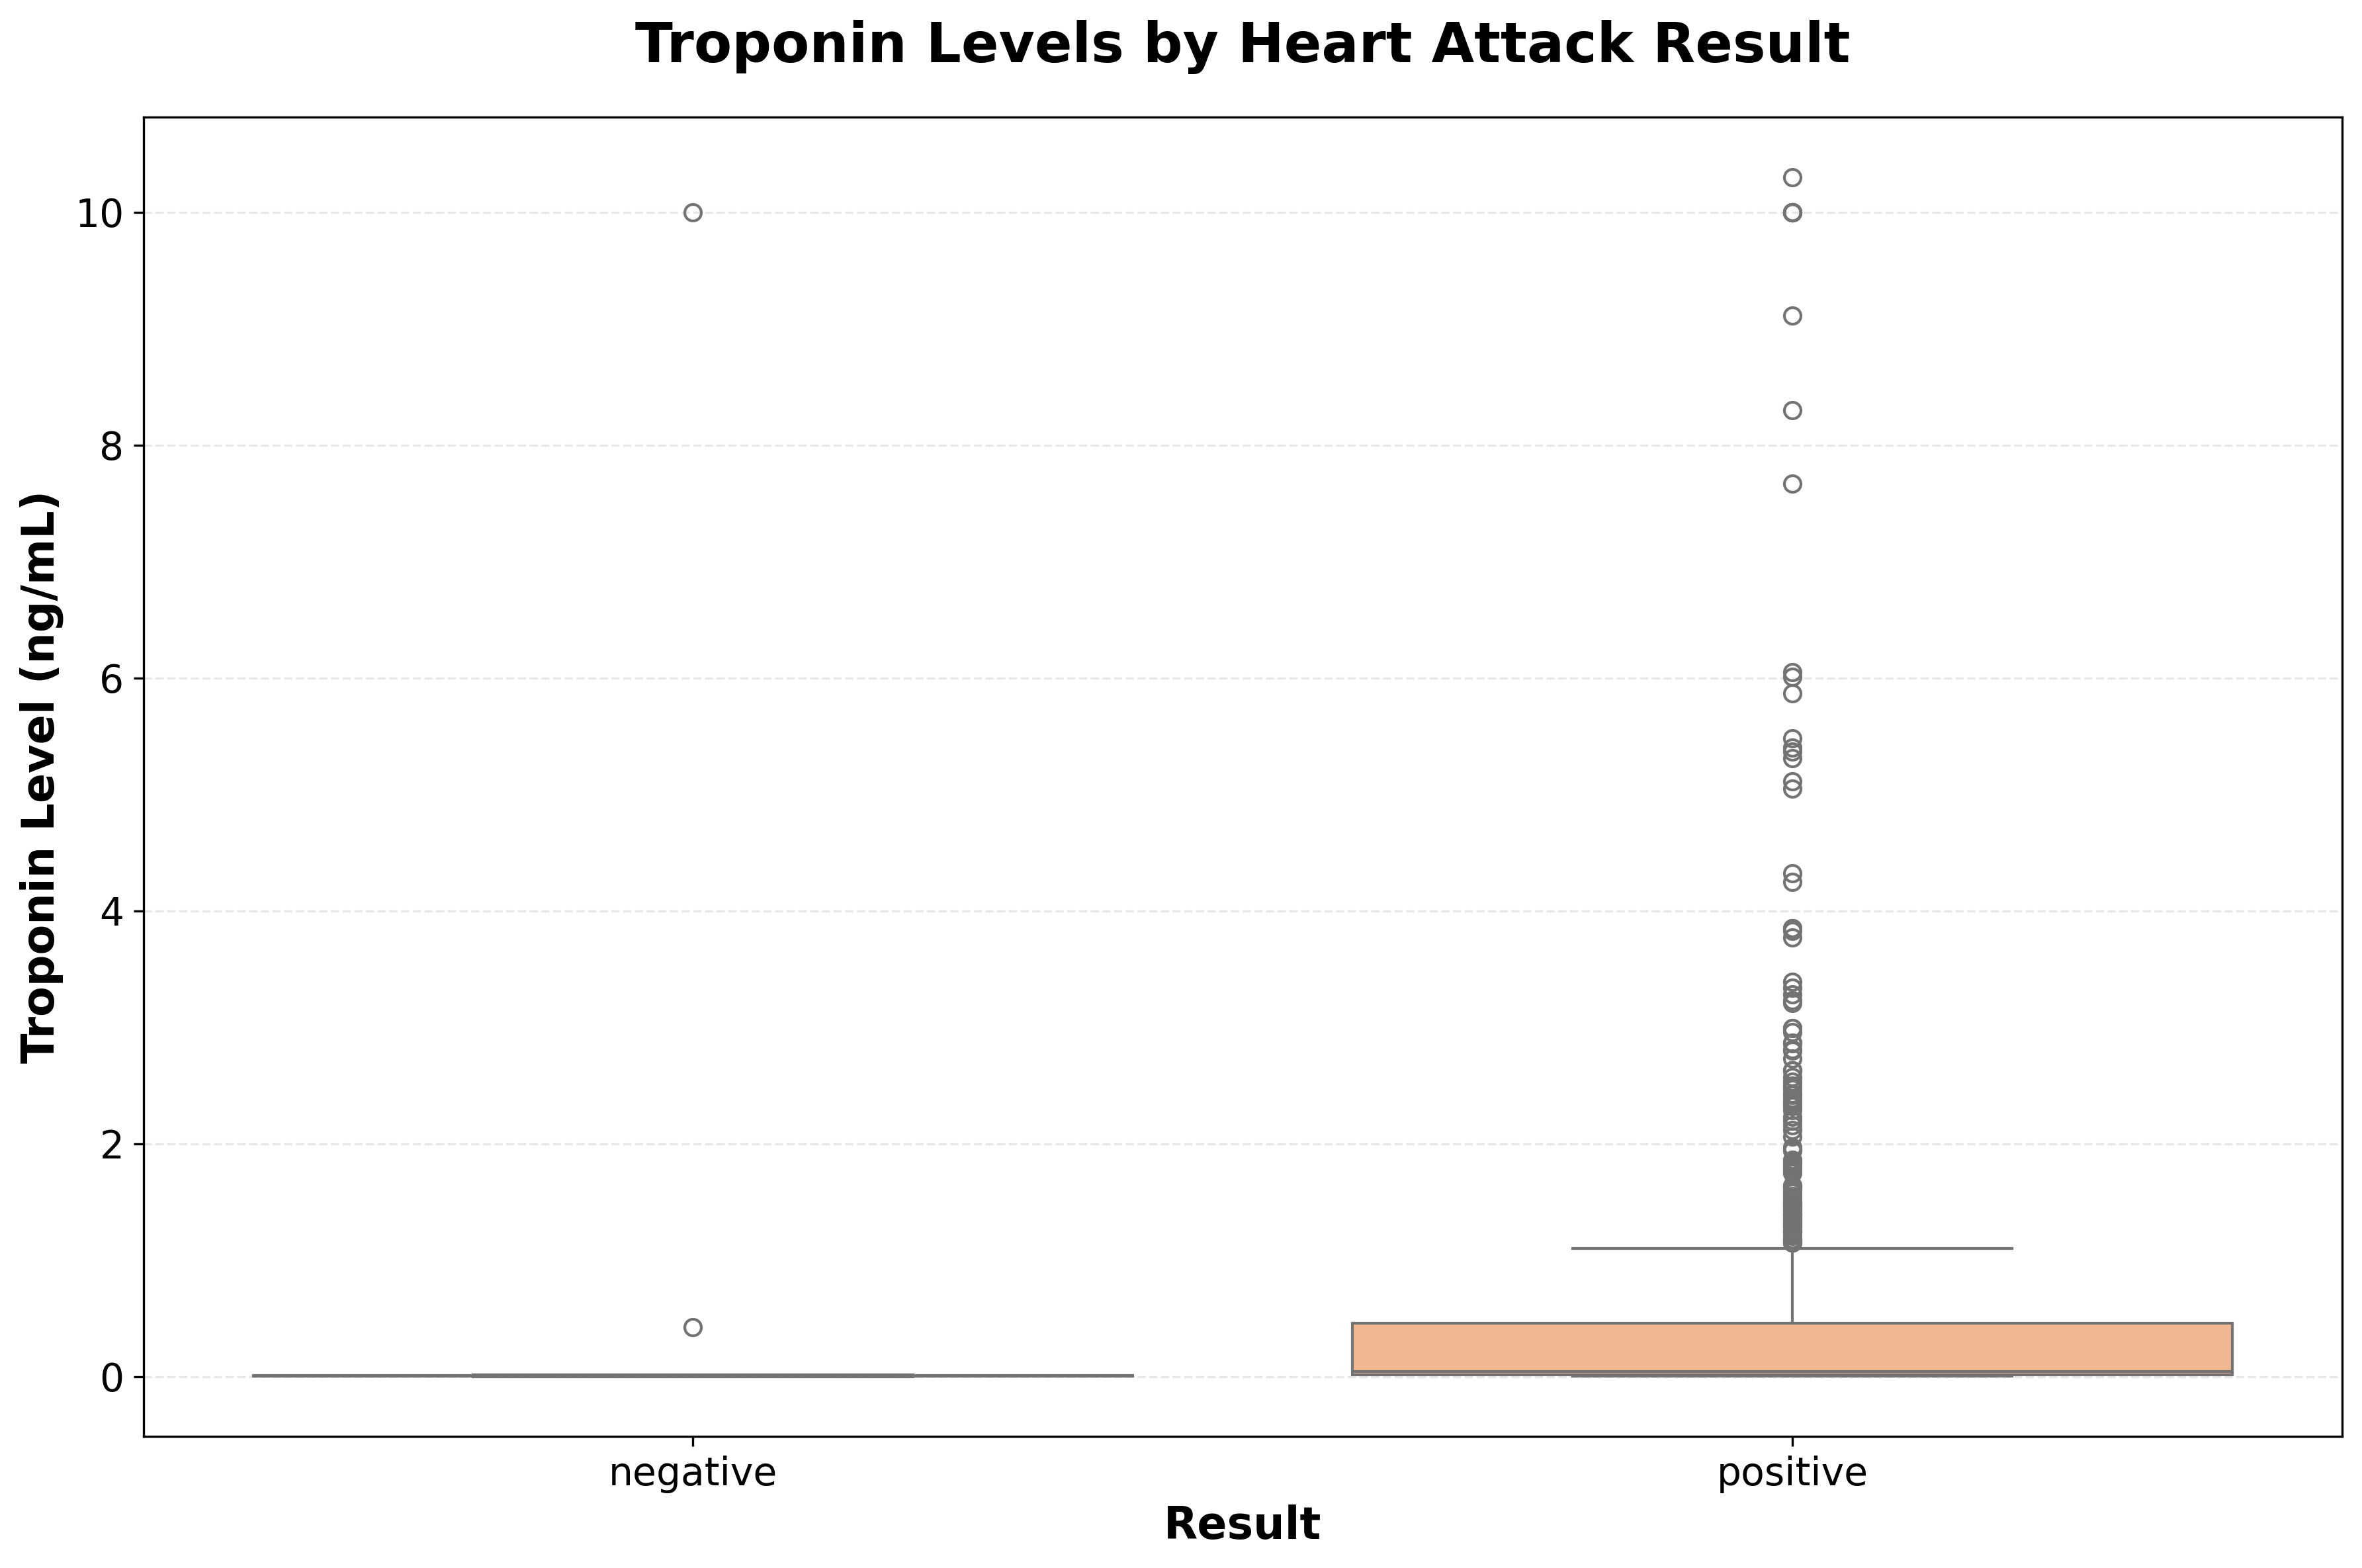

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Result', y='Troponin', palette='pastel', hue='Result', legend=False)
plt.title('Troponin Levels by Heart Attack Result', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Result', fontsize=16, fontweight='bold')
plt.ylabel('Troponin Level (ng/mL)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### 8. Gender Distribution Analysis

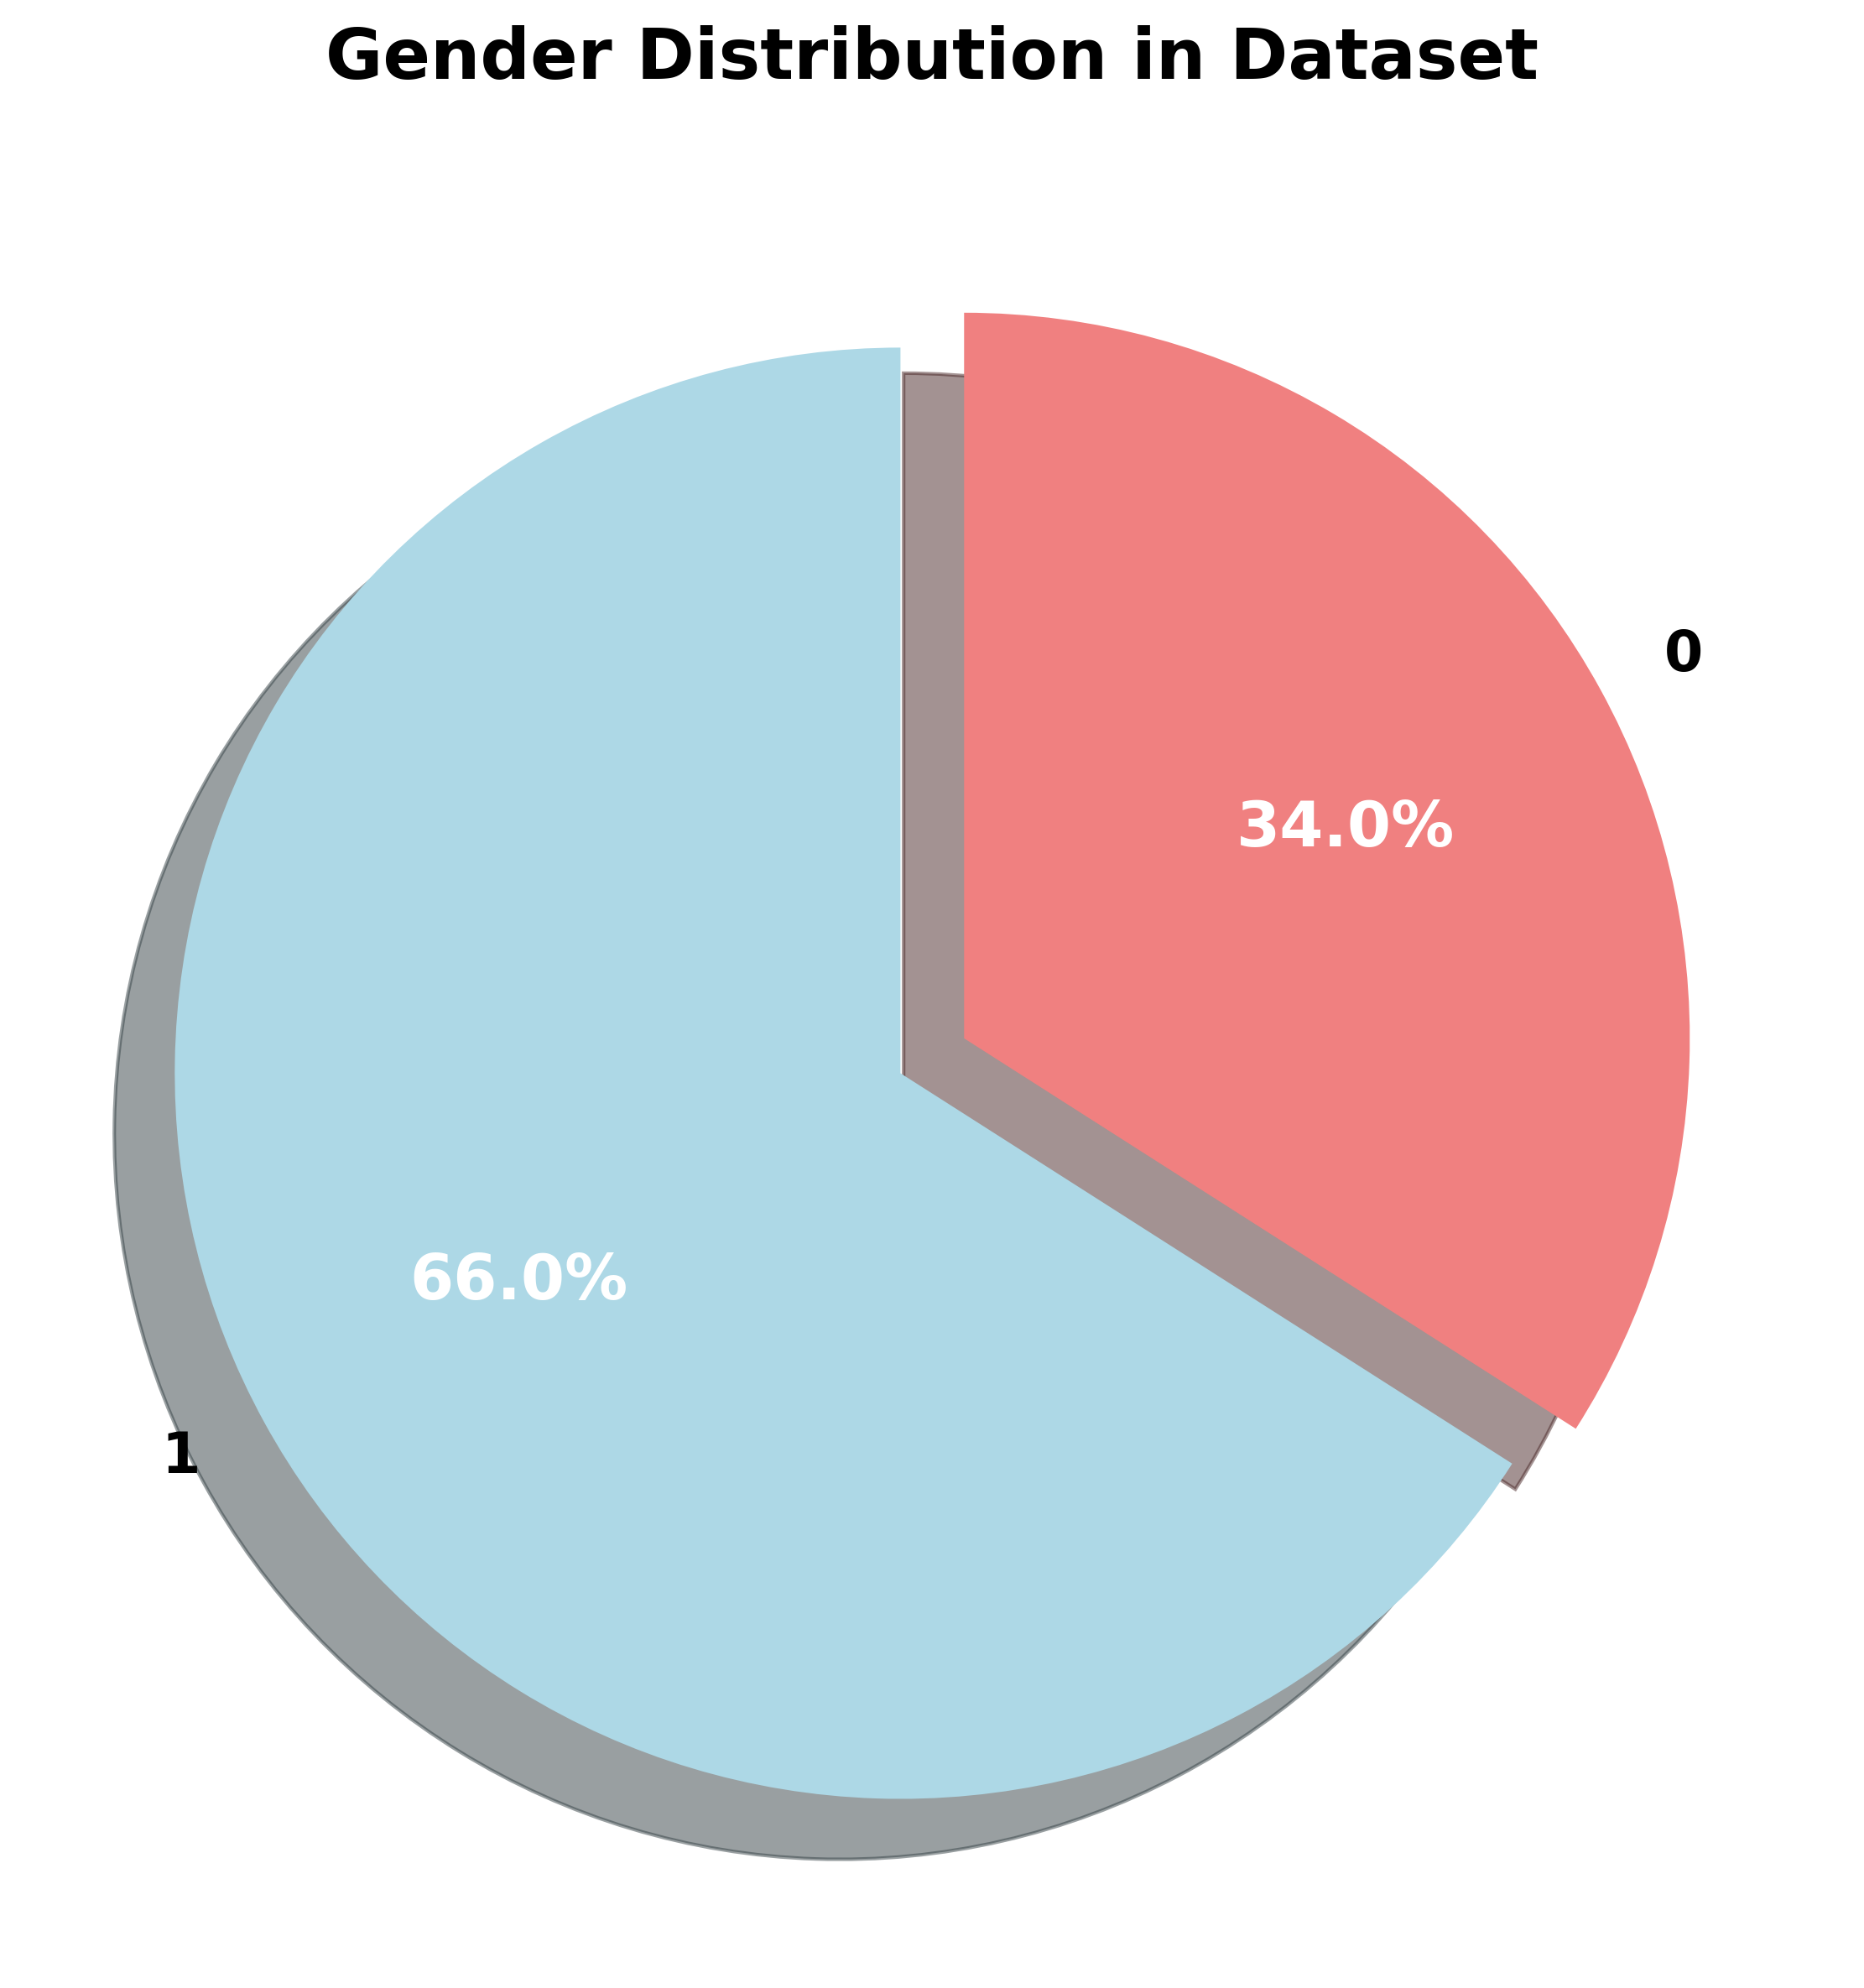

In [18]:
plt.figure(figsize=(12, 8))
gender_counts = data['Gender'].value_counts()
colors = ['lightblue', 'lightcoral']
wedges, texts, autotexts = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
                                    colors=colors, startangle=90, textprops={'fontsize': 16, 'fontweight': 'bold'},
                                    explode=(0.05, 0.05), shadow=True)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(18)
    autotext.set_fontweight('bold')

plt.title('Gender Distribution in Dataset', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 9. Feature Correlation Heatmap

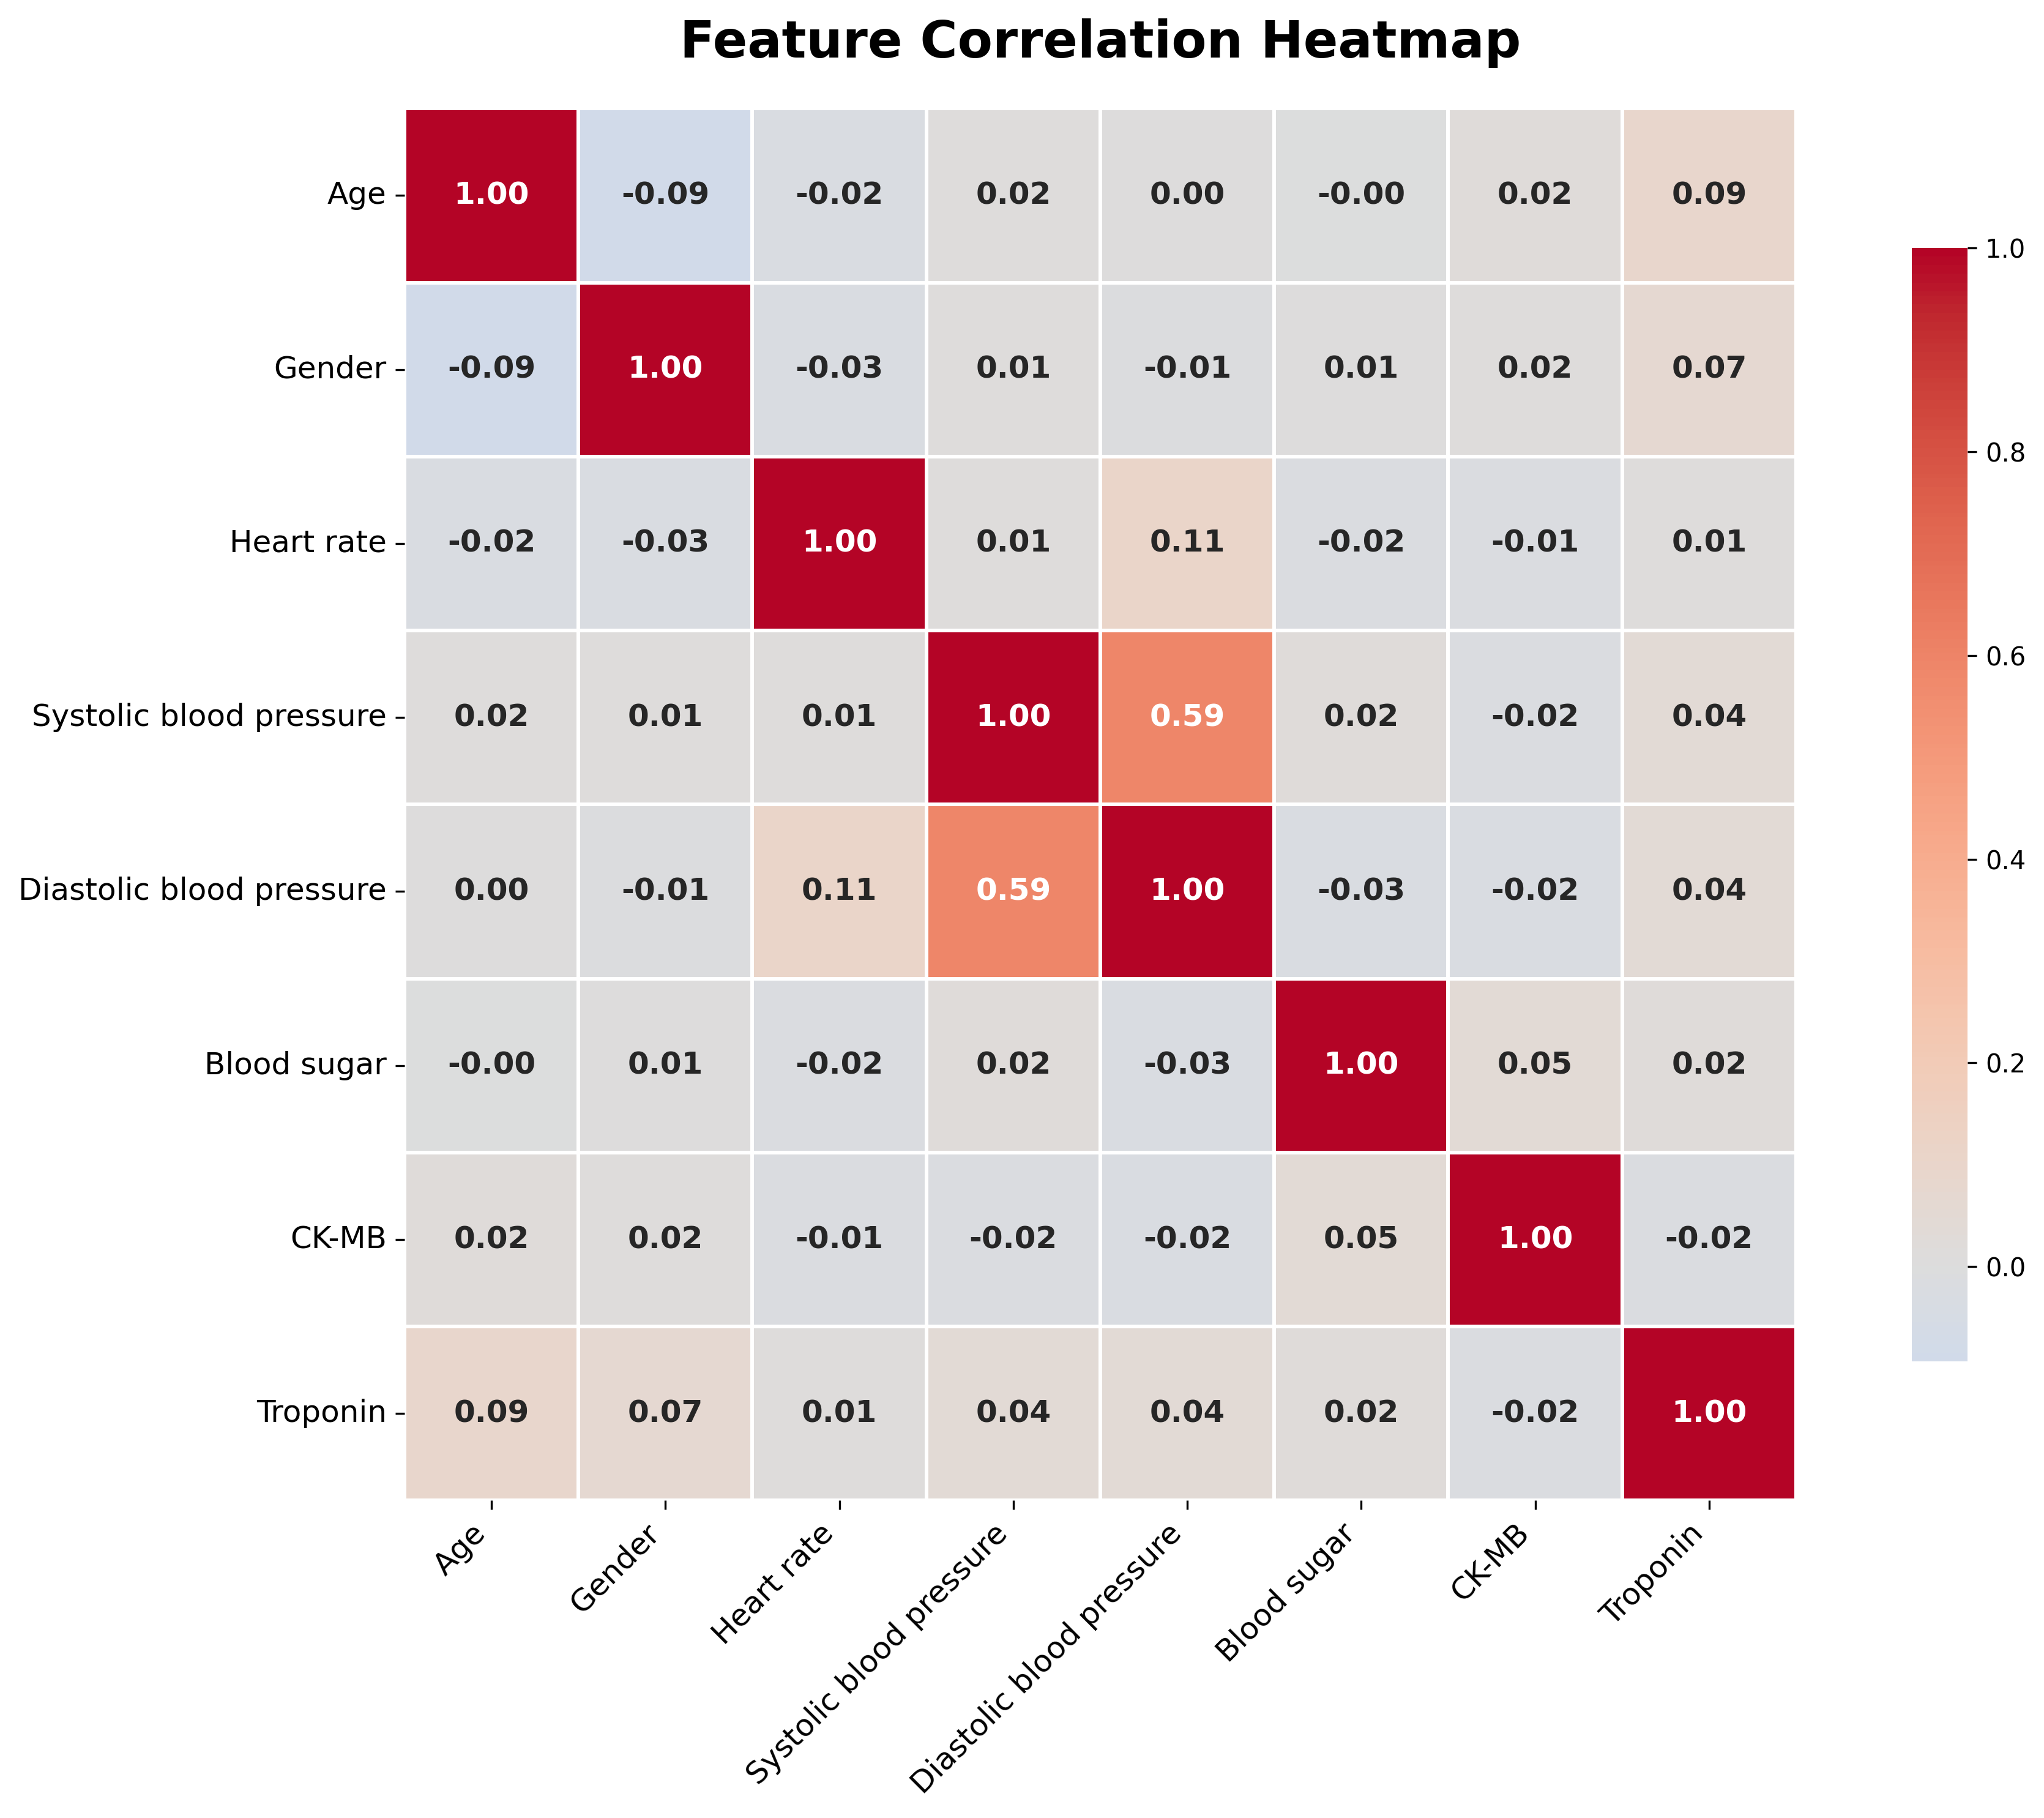

In [19]:
plt.figure(figsize=(14, 10))
numeric_cols = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 
                'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
correlation_matrix = data[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Feature Correlation Heatmap', fontsize=20, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# Reset matplotlib settings to default
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

## Data Preparation

Split the data and prepare features for model training:

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, Y = train_test_split(df, test_size=.25, random_state=42, shuffle=True)

In [23]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (989, 9)
Y shape: (330, 9)


In [24]:
independent_cols = ['Age', 'Gender','Heart rate', 'Systolic blood pressure','Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
dependent_col = 'Result'

In [25]:
X_train = X[independent_cols]
Y_train = X[dependent_col]
X_test = Y[independent_cols]
Y_test = Y[dependent_col]

In [26]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (989, 8)
Y_train shape: (989,)
X_test shape: (330, 8)
Y_test shape: (330,)


## Model 1: Logistic Regression

Train and evaluate a Logistic Regression model:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
print("Accuracy of Logistic Regression model:", accuracy_score(Y_test, logreg.predict(X_test)))

Accuracy of Logistic Regression model: 0.7787878787878788


In [30]:
confusion_matrix(Y_test, logreg.predict(X_test))

array([[ 86,  42],
       [ 31, 171]])

In [28]:
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.74      0.67      0.70       128
    positive       0.80      0.85      0.82       202

    accuracy                           0.78       330
   macro avg       0.77      0.76      0.76       330
weighted avg       0.78      0.78      0.78       330



## Model 2: Random Forest Classifier

Train and evaluate a Random Forest model:

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
print("Accuracy of Random Forest model:", accuracy_score(Y_test, rf_model.predict(X_test)))

Accuracy of Random Forest model: 0.9757575757575757


In [34]:
confusion_matrix(Y_test, rf_model.predict(X_test))

array([[123,   5],
       [  3, 199]])

In [33]:
print(classification_report(Y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.98      0.96      0.97       128
    positive       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330



## Model 3: XGBoost 
Train and evaluate a is XGBoost model:

In [35]:
# Convert categorical dependent variable to numerical
df[dependent_col] = df[dependent_col].map({'positive':1,'negative':0})
print(df.head)

<bound method NDFrame.head of       Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result  
0                           83        160.0   1.80     0.012       0  
1                           46        296.0   6.75     1.060       1  
2                           77        270.0   1.99     0.003

In [36]:
x, y = train_test_split(df, test_size=.25, random_state=42, shuffle=True)
x_train = x[independent_cols]
y_train = x[dependent_col]
x_test = y[independent_cols]
y_test = y[dependent_col]

In [37]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [38]:
print("Accuracy of model", accuracy_score(y_test, xgb_model.predict(x_test)))

Accuracy of model 0.9757575757575757


In [39]:
print(confusion_matrix(y_test, xgb_model.predict(x_test)))

[[123   5]
 [  3 199]]


In [40]:
print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330



## Model Persistence

Save and load the Random Forest model:

In [41]:
# Save the models
import joblib
joblib.dump(rf_model, 'heart_attack_rf_model.pkl')
joblib.dump(logreg, 'heart_attack_logreg_model.pkl')
joblib.dump(xgb_model, 'heart_attack_xgb_model.pkl')

['heart_attack_xgb_model.pkl']

In [42]:
# Load the saved model
loaded_logreg_model = joblib.load('heart_attack_logreg_model.pkl')
loaded_rf_model = joblib.load('heart_attack_rf_model.pkl')

In [43]:
# Test the loaded model
print("Loaded Logistic Regression model accuracy:", accuracy_score(Y_test, loaded_logreg_model.predict(X_test)))
print("Loaded Random Forest model accuracy:", accuracy_score(Y_test, loaded_rf_model.predict(X_test)))
print("Loaded XGBoost model accuracy:", accuracy_score(y_test, xgb_model.predict(x_test)))

Loaded Logistic Regression model accuracy: 0.7787878787878788
Loaded Random Forest model accuracy: 0.9757575757575757
Loaded XGBoost model accuracy: 0.9757575757575757


## Model Comparison Visualizations

### 1. Bar Chart: Quick Metric Comparison

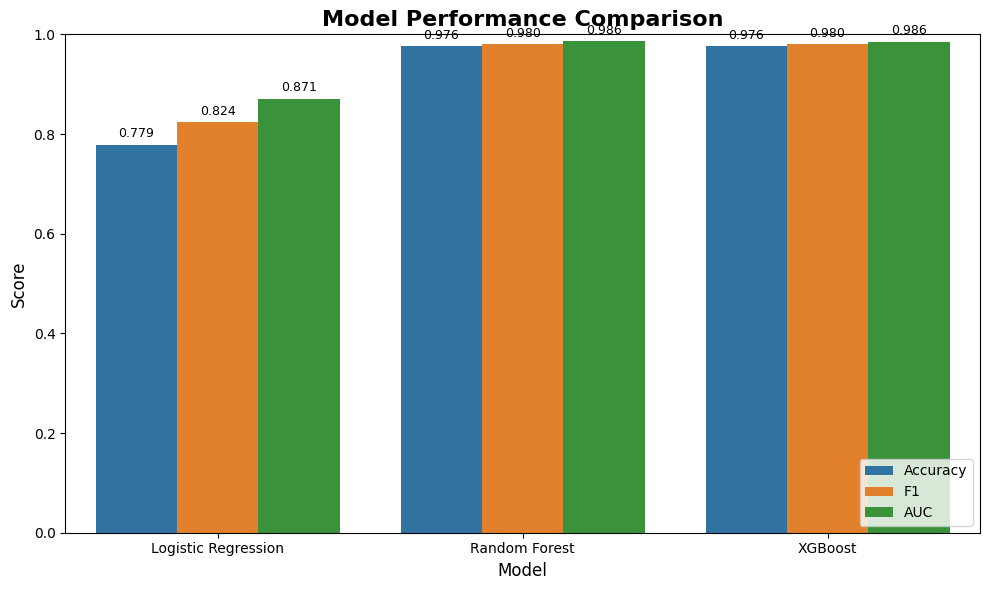


Model Metrics Summary:
              Model  Accuracy       F1      AUC
Logistic Regression  0.778788 0.824096 0.871113
      Random Forest  0.975758 0.980296 0.986425
            XGBoost  0.975758 0.980296 0.985574


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


metrics_data = []


lr_pred = logreg.predict(X_test)
lr_proba = logreg.predict_proba(X_test)[:, 1]
Y_test_binary = Y_test.map({'negative': 0, 'positive': 1})
metrics_data.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(Y_test, lr_pred),
    "F1": f1_score(Y_test, lr_pred, pos_label='positive'),
    "AUC": roc_auc_score(Y_test_binary, lr_proba)
})


rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
metrics_data.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(Y_test, rf_pred),
    "F1": f1_score(Y_test, rf_pred, pos_label='positive'),
    "AUC": roc_auc_score(Y_test_binary, rf_proba)
})


xgb_pred = xgb_model.predict(x_test)
xgb_proba = xgb_model.predict_proba(x_test)[:, 1]
metrics_data.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "F1": f1_score(y_test, xgb_pred),
    "AUC": roc_auc_score(y_test, xgb_proba)
})


metrics_df = pd.DataFrame(metrics_data)
melted = metrics_df.melt(id_vars="Model", value_vars=["Accuracy", "F1", "AUC"],
                         var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Model", y="Score", hue="Metric")
plt.ylim(0, 1.0)
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)


for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

print("\nModel Metrics Summary:")
print(metrics_df.to_string(index=False))

### 2. ROC Curve: Discrimination Ability Comparison

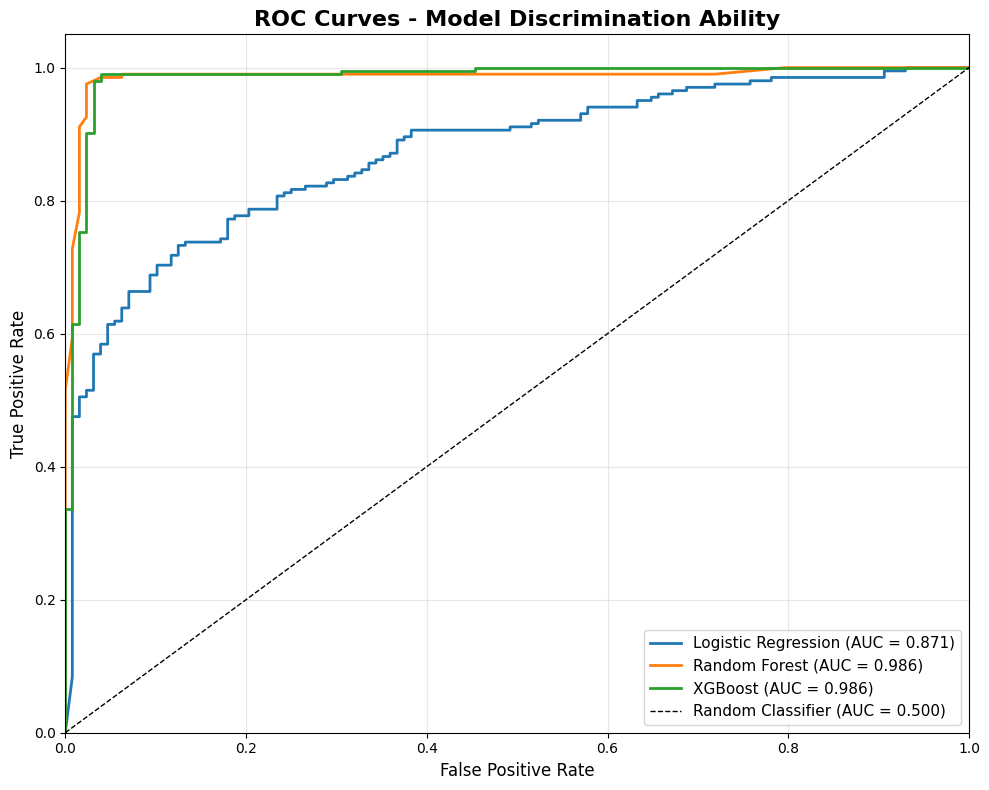

In [45]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))


fpr_lr, tpr_lr, _ = roc_curve(Y_test_binary, lr_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')


fpr_rf, tpr_rf, _ = roc_curve(Y_test_binary, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')


fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')


plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Discrimination Ability', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Confusion Matrix Heatmaps: Misclassification Analysis

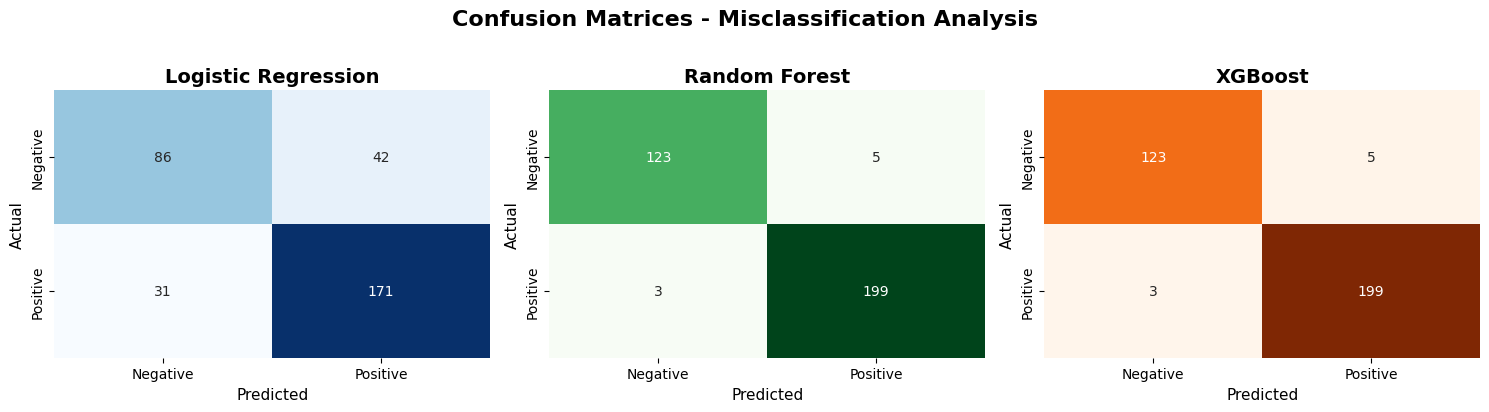

In [46]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(15, 4))


cm_lr = confusion_matrix(Y_test, lr_pred, labels=['negative', 'positive'])
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[0].set_title('Logistic Regression', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('Actual', fontsize=11)


cm_rf = confusion_matrix(Y_test, rf_pred, labels=['negative', 'positive'])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[1].set_title('Random Forest', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('Actual', fontsize=11)


cm_xgb = confusion_matrix(y_test, xgb_pred, labels=[0, 1])
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[2],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[2].set_title('XGBoost', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Predicted', fontsize=11)
axes[2].set_ylabel('Actual', fontsize=11)

plt.suptitle('Confusion Matrices - Misclassification Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4. Feature Importance: Model Behavior Interpretation

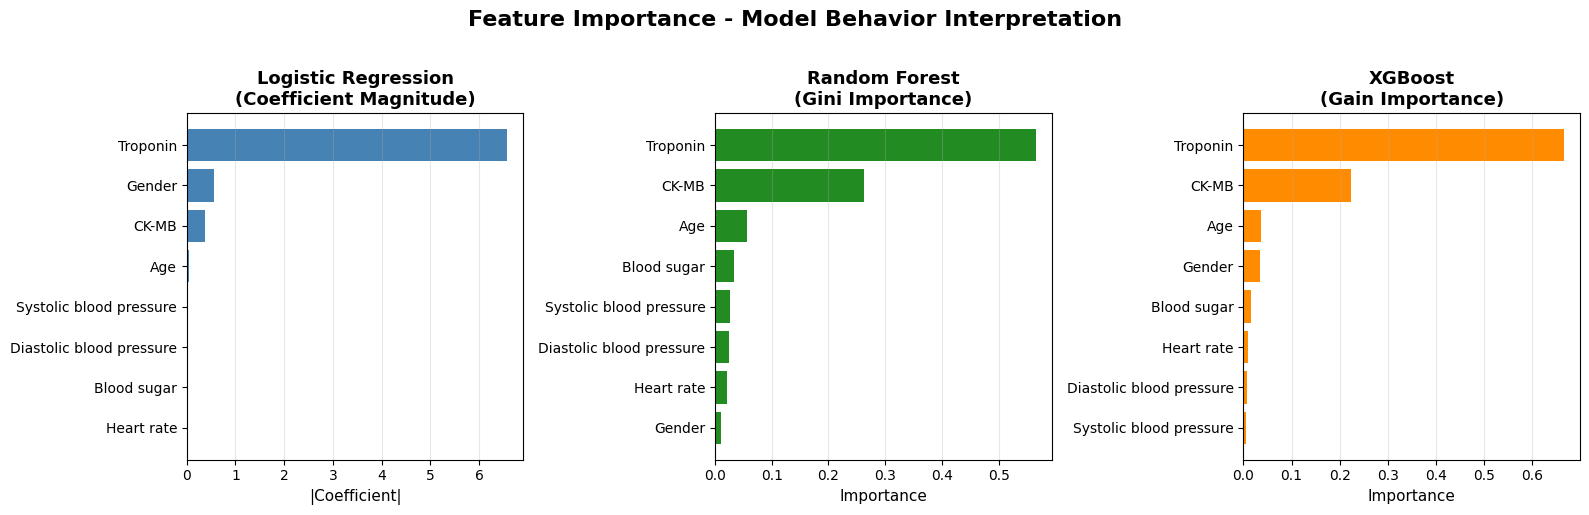


Top 3 Most Important Features:

Logistic Regression:
 Feature  Importance
   CK-MB    0.381692
  Gender    0.557021
Troponin    6.580996

Random Forest:
 Feature  Importance
     Age    0.056320
   CK-MB    0.262993
Troponin    0.565233

XGBoost:
 Feature  Importance
     Age    0.037320
   CK-MB    0.223144
Troponin    0.665440


In [47]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(16, 5))


lr_coef = np.abs(logreg.coef_[0])
lr_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': lr_coef
}).sort_values('Importance', ascending=True)

axes[0].barh(lr_importance['Feature'], lr_importance['Importance'], color='steelblue')
axes[0].set_title('Logistic Regression\n(Coefficient Magnitude)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('|Coefficient|', fontsize=11)
axes[0].grid(axis='x', alpha=0.3)


rf_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(rf_importance['Feature'], rf_importance['Importance'], color='forestgreen')
axes[1].set_title('Random Forest\n(Gini Importance)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Importance', fontsize=11)
axes[1].grid(axis='x', alpha=0.3)


xgb_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[2].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='darkorange')
axes[2].set_title('XGBoost\n(Gain Importance)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Importance', fontsize=11)
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Feature Importance - Model Behavior Interpretation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


print("\nTop 3 Most Important Features:\n")
print("Logistic Regression:")
print(lr_importance.tail(3).to_string(index=False))
print("\nRandom Forest:")
print(rf_importance.tail(3).to_string(index=False))
print("\nXGBoost:")
print(xgb_importance.tail(3).to_string(index=False))